In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

dataset = pd.read_csv("./delivery_raw.csv")
df = dataset.copy()
df.head(5)

market_id\tcreated_at\tactual_delivery_time\tstore_id\tstore_primary_category\torder_protocol\ttotal_items\tsubtotal\tnum_distinct_items\tmin_item_price\tmax_item_price\ttotal_onshift\ttotal_busy\ttotal_outstanding_orders\testimated_order_place_duration\testimated_store_to_consumer_driving_duration
0  1\t2015-02-06 22:24:17\t2015-02-06 23:27:16\t"...                                                                                                                                                                                                                                                         
1  2\t2015-02-10 21:49:25\t2015-02-10 22:56:29\t"...                                                                                                                                                                                                                                                         
2  3\t2015-01-22 20:39:28\t2015-01-22 21:09:09\t"...                                                                                                                                                                                                                                                         
3  3\t2015-02-03 21:21:45\t2015-02-03 22:13:00\t"...                                                                                                                                                                                                                                                         
4  3\t2015-02-15 02:40:36\t2015-02-15 03:20:26\t"...

In [2]:
df = pd.read_csv("./delivery_raw.csv", delimiter='\t')
df

market_id           created_at actual_delivery_time  store_id  \
0             1.0  2015-02-06 22:24:17  2015-02-06 23:27:16      1845   
1             2.0  2015-02-10 21:49:25  2015-02-10 22:56:29      5477   
2             3.0  2015-01-22 20:39:28  2015-01-22 21:09:09      5477   
3             3.0  2015-02-03 21:21:45  2015-02-03 22:13:00      5477   
4             3.0  2015-02-15 02:40:36  2015-02-15 03:20:26      5477   
...           ...                  ...                  ...       ...   
197423        1.0  2015-02-17 00:19:41  2015-02-17 01:24:48      2956   
197424        1.0  2015-02-13 00:01:59  2015-02-13 00:58:22      2956   
197425        1.0  2015-01-24 04:46:08  2015-01-24 05:36:16      2956   
197426        1.0  2015-02-01 18:18:15  2015-02-01 19:23:22      3630   
197427        1.0  2015-02-08 19:24:33  2015-02-08 20:01:41      3630   

       store_primary_category  order_protocol  total_items  subtotal  \
0                    american             1.0            4      3441   
1                     mexican             2.0            1      1900   
2                         NaN             1.0            1      1900   
3                         NaN             1.0            6      6900   
4                         NaN             1.0            3      3900   
...                       ...             ...          ...       ...   
197423                   fast             4.0            3      1389   
197424                   fast             4.0            6      3010   
197425                   fast             4.0            5      1836   
197426               sandwich             1.0            1      1175   
197427               sandwich             1.0            4      2605   

        num_distinct_items  min_item_price  max_item_price  total_onshift  \
0                        4             557            1239           33.0   
1                        1            1400            1400            1.0   
2                        1            1900            1900            1.0   
3                        5             600            1800            1.0   
4                        3            1100            1600            6.0   
...                    ...             ...             ...            ...   
197423                   3             345             649           17.0   
197424                   4             405             825           12.0   
197425                   3             300             399           39.0   
197426                   1             535             535            7.0   
197427                   4             425             750           20.0   

        total_busy  total_outstanding_orders  estimated_order_place_duration  \
0             14.0                      21.0                             446   
1              2.0                       2.0                             446   
2              0.0                       0.0                             446   
3              1.0                       2.0                             446   
4              6.0                       9.0                             446   
...            ...                       ...                             ...   
197423        17.0                      23.0                             251   
197424        11.0                      14.0                             251   
197425        41.0                      40.0                             251   
197426         7.0                      12.0                             446   
197427        20.0                      23.0                             446   

        estimated_store_to_consumer_driving_duration  
0                                              861.0  
1                                              690.0  
2                                              690.0  
3                                              289.0  
4                                              650.0  
...                                              .

In [3]:
df.dtypes

market_id                                       float64
created_at                                       object
actual_delivery_time                             object
store_id                                          int64
store_primary_category                           object
order_protocol                                  float64
total_items                                       int64
subtotal                                          int64
num_distinct_items                                int64
min_item_price                                    int64
max_item_price                                    int64
total_onshift                                   float64
total_busy                                      float64
total_outstanding_orders                        float64
estimated_order_place_duration                    int64
estimated_store_to_consumer_driving_duration    float64
dtype: object

In [4]:
df['created_at_time'] = pd.to_datetime(df['created_at'])
df['actual_delivery_time_time'] = pd.to_datetime(df['actual_delivery_time'])
df['time'] = df['actual_delivery_time_time'] - df['created_at_time']
df['delivery_time'] = df['time'].dt.total_seconds()

In [5]:
df.dtypes

market_id                                               float64
created_at                                               object
actual_delivery_time                                     object
store_id                                                  int64
store_primary_category                                   object
order_protocol                                          float64
total_items                                               int64
subtotal                                                  int64
num_distinct_items                                        int64
min_item_price                                            int64
max_item_price                                            int64
total_onshift                                           float64
total_busy                                              float64
total_outstanding_orders                                float64
estimated_order_place_duration                            int64
estimated_store_to_consumer_driving_dura

In [6]:
df['actual_delivery_time']

0         2015-02-06 23:27:16
1         2015-02-10 22:56:29
2         2015-01-22 21:09:09
3         2015-02-03 22:13:00
4         2015-02-15 03:20:26
                 ...         
197423    2015-02-17 01:24:48
197424    2015-02-13 00:58:22
197425    2015-01-24 05:36:16
197426    2015-02-01 19:23:22
197427    2015-02-08 20:01:41
Name: actual_delivery_time, Length: 197428, dtype: object

In [7]:
df = df.drop(labels=['time', 'actual_delivery_time', 'created_at',
                     'created_at_time', 'actual_delivery_time_time'],axis=1)

In [8]:
df

market_id  store_id store_primary_category  order_protocol  \
0             1.0      1845               american             1.0   
1             2.0      5477                mexican             2.0   
2             3.0      5477                    NaN             1.0   
3             3.0      5477                    NaN             1.0   
4             3.0      5477                    NaN             1.0   
...           ...       ...                    ...             ...   
197423        1.0      2956                   fast             4.0   
197424        1.0      2956                   fast             4.0   
197425        1.0      2956                   fast             4.0   
197426        1.0      3630               sandwich             1.0   
197427        1.0      3630               sandwich             1.0   

        total_items  subtotal  num_distinct_items  min_item_price  \
0                 4      3441                   4             557   
1                 1      1900                   1            1400   
2                 1      1900                   1            1900   
3                 6      6900                   5             600   
4                 3      3900                   3            1100   
...             ...       ...                 ...             ...   
197423            3      1389                   3             345   
197424            6      3010                   4             405   
197425            5      1836                   3             300   
197426            1      1175                   1             535   
197427            4      2605                   4             425   

        max_item_price  total_onshift  total_busy  total_outstanding_orders  \
0                 1239           33.0        14.0                      21.0   
1                 1400            1.0         2.0                       2.0   
2                 1900            1.0         0.0                       0.0   
3                 1800            1.0         1.0                       2.0   
4                 1600            6.0         6.0                       9.0   
...                ...            ...         ...                       ...   
197423             649           17.0        17.0                      23.0   
197424             825           12.0        11.0                      14.0   
197425             399           39.0        41.0                      40.0   
197426             535            7.0         7.0                      12.0   
197427             750           20.0        20.0                      23.0   

        estimated_order_place_duration  \
0                                  446   
1                                  446   
2                                  446   
3                                  446   
4                                  446   
...                                ...   
197423                             251   
197424                             251   
197425                             251   
197426                             446   
197427                             446   

        estimated_store_to_consumer_driving_duration  delivery_time  
0                                              861.0         3779.0  
1                                              690.0         4024.0  
2                                              690.0         1781.0  
3                                              289.0         3075.0  
4                                              650.0         2390.0  
...                                              ...            ...  
197423                                         331.0         3907.0  
197424                                         915.0         3383.0  
197425                                         795.0         3008.0  
197426                                         384.0         3907.0  
197427                                         134.0         2228.0  

[197428 rows x 15 columns]

In [9]:
df.isnull().sum()

market_id                                         987
store_id                                            0
store_primary_category                           4760
order_protocol                                    995
total_items                                         0
subtotal                                            0
num_distinct_items                                  0
min_item_price                                      0
max_item_price                                      0
total_onshift                                   16262
total_busy                                      16262
total_outstanding_orders                        16262
estimated_order_place_duration                      0
estimated_store_to_consumer_driving_duration      526
delivery_time                                       7
dtype: int64

In [10]:
df_del = df.dropna()
df_del.isnull().sum()

market_id                                       0
store_id                                        0
store_primary_category                          0
order_protocol                                  0
total_items                                     0
subtotal                                        0
num_distinct_items                              0
min_item_price                                  0
max_item_price                                  0
total_onshift                                   0
total_busy                                      0
total_outstanding_orders                        0
estimated_order_place_duration                  0
estimated_store_to_consumer_driving_duration    0
delivery_time                                   0
dtype: int64

In [11]:
df_del

market_id  store_id store_primary_category  order_protocol  \
0             1.0      1845               american             1.0   
1             2.0      5477                mexican             2.0   
8             2.0      5477                 indian             3.0   
14            1.0      2841                italian             1.0   
15            1.0      2841                italian             1.0   
...           ...       ...                    ...             ...   
197423        1.0      2956                   fast             4.0   
197424        1.0      2956                   fast             4.0   
197425        1.0      2956                   fast             4.0   
197426        1.0      3630               sandwich             1.0   
197427        1.0      3630               sandwich             1.0   

        total_items  subtotal  num_distinct_items  min_item_price  \
0                 4      3441                   4             557   
1                 1      1900                   1            1400   
8                 4      4771                   3             820   
14                1      1525                   1            1525   
15                2      3620                   2            1425   
...             ...       ...                 ...             ...   
197423            3      1389                   3             345   
197424            6      3010                   4             405   
197425            5      1836                   3             300   
197426            1      1175                   1             535   
197427            4      2605                   4             425   

        max_item_price  total_onshift  total_busy  total_outstanding_orders  \
0                 1239           33.0        14.0                      21.0   
1                 1400            1.0         2.0                       2.0   
8                 1604            8.0         6.0                      18.0   
14                1525            5.0         6.0                       8.0   
15                2195            5.0         5.0                       7.0   
...                ...            ...         ...                       ...   
197423             649           17.0        17.0                      23.0   
197424             825           12.0        11.0                      14.0   
197425             399           39.0        41.0                      40.0   
197426             535            7.0         7.0                      12.0   
197427             750           20.0        20.0                      23.0   

        estimated_order_place_duration  \
0                                  446   
1                                  446   
8                                  446   
14                                 446   
15                                 446   
...                                ...   
197423                             251   
197424                             251   
197425                             251   
197426                             446   
197427                             446   

        estimated_store_to_consumer_driving_duration  delivery_time  
0                                              861.0         3779.0  
1                                              690.0         4024.0  
8                                              289.0         1586.0  
14                                             795.0         2273.0  
15                                             205.0         2988.0  
...                                              ...            ...  
197423                                         331.0         3907.0  
197424                                         915.0         3383.0  
197425                                         795.0         3008.0  
197426                                         384.0         3907.0  
197427                                         134.0         2228.0  

[175777 rows x 15 columns]

In [12]:
df_del.reset_index(drop=False, inplace=True)
df_del = df_del.drop(labels=['index'],axis=1)
df_del

market_id  store_id store_primary_category  order_protocol  \
0             1.0      1845               american             1.0   
1             2.0      5477                mexican             2.0   
2             2.0      5477                 indian             3.0   
3             1.0      2841                italian             1.0   
4             1.0      2841                italian             1.0   
...           ...       ...                    ...             ...   
175772        1.0      2956                   fast             4.0   
175773        1.0      2956                   fast             4.0   
175774        1.0      2956                   fast             4.0   
175775        1.0      3630               sandwich             1.0   
175776        1.0      3630               sandwich             1.0   

        total_items  subtotal  num_distinct_items  min_item_price  \
0                 4      3441                   4             557   
1                 1      1900                   1            1400   
2                 4      4771                   3             820   
3                 1      1525                   1            1525   
4                 2      3620                   2            1425   
...             ...       ...                 ...             ...   
175772            3      1389                   3             345   
175773            6      3010                   4             405   
175774            5      1836                   3             300   
175775            1      1175                   1             535   
175776            4      2605                   4             425   

        max_item_price  total_onshift  total_busy  total_outstanding_orders  \
0                 1239           33.0        14.0                      21.0   
1                 1400            1.0         2.0                       2.0   
2                 1604            8.0         6.0                      18.0   
3                 1525            5.0         6.0                       8.0   
4                 2195            5.0         5.0                       7.0   
...                ...            ...         ...                       ...   
175772             649           17.0        17.0                      23.0   
175773             825           12.0        11.0                      14.0   
175774             399           39.0        41.0                      40.0   
175775             535            7.0         7.0                      12.0   
175776             750           20.0        20.0                      23.0   

        estimated_order_place_duration  \
0                                  446   
1                                  446   
2                                  446   
3                                  446   
4                                  446   
...                                ...   
175772                             251   
175773                             251   
175774                             251   
175775                             446   
175776                             446   

        estimated_store_to_consumer_driving_duration  delivery_time  
0                                              861.0         3779.0  
1                                              690.0         4024.0  
2                                              289.0         1586.0  
3                                              795.0         2273.0  
4                                              205.0         2988.0  
...                                              ...            ...  
175772                                         331.0         3907.0  
175773                                         915.0         3383.0  
175774                                         795.0         3008.0  
175775                                         384.0         3907.0  
175776                                         134.0         2228.0  

[175777 rows x 15 columns]

In [13]:
df_del['store_primary_category'].value_counts()

store_primary_category
american             18183
pizza                15745
mexican              15586
burger                9915
sandwich              8995
                     ...  
african                 10
lebanese                 9
belgian                  2
chocolate                1
alcohol-plus-food        1
Name: count, Length: 73, dtype: int64

In [14]:
category = []

category = df_del['store_primary_category'].unique().tolist()
df_category = df_del['store_primary_category'].to_list()

for i in range(len(df_category)):
    df_category[i] = category.index(df_category[i])
    
df_del['store_primary_category'] = df_category
df_del

market_id  store_id  store_primary_category  order_protocol  \
0             1.0      1845                       0             1.0   
1             2.0      5477                       1             2.0   
2             2.0      5477                       2             3.0   
3             1.0      2841                       3             1.0   
4             1.0      2841                       3             1.0   
...           ...       ...                     ...             ...   
175772        1.0      2956                      23             4.0   
175773        1.0      2956                      23             4.0   
175774        1.0      2956                      23             4.0   
175775        1.0      3630                       4             1.0   
175776        1.0      3630                       4             1.0   

        total_items  subtotal  num_distinct_items  min_item_price  \
0                 4      3441                   4             557   
1                 1      1900                   1            1400   
2                 4      4771                   3             820   
3                 1      1525                   1            1525   
4                 2      3620                   2            1425   
...             ...       ...                 ...             ...   
175772            3      1389                   3             345   
175773            6      3010                   4             405   
175774            5      1836                   3             300   
175775            1      1175                   1             535   
175776            4      2605                   4             425   

        max_item_price  total_onshift  total_busy  total_outstanding_orders  \
0                 1239           33.0        14.0                      21.0   
1                 1400            1.0         2.0                       2.0   
2                 1604            8.0         6.0                      18.0   
3                 1525            5.0         6.0                       8.0   
4                 2195            5.0         5.0                       7.0   
...                ...            ...         ...                       ...   
175772             649           17.0        17.0                      23.0   
175773             825           12.0        11.0                      14.0   
175774             399           39.0        41.0                      40.0   
175775             535            7.0         7.0                      12.0   
175776             750           20.0        20.0                      23.0   

        estimated_order_place_duration  \
0                                  446   
1                                  446   
2                                  446   
3                                  446   
4                                  446   
...                                ...   
175772                             251   
175773                             251   
175774                             251   
175775                             446   
175776                             446   

        estimated_store_to_consumer_driving_duration  delivery_time  
0                                              861.0         3779.0  
1                                              690.0         4024.0  
2                                              289.0         1586.0  
3                                              795.0         2273.0  
4                                              205.0         2988.0  
...                                              ...            ...  
175772                                         331.0         3907.0  
175773                                         915.0         3383.0  
175774                                         795.0         3008.0  
175775                                         384.0         3907.0  
175776                                         134.0         2228.0  

[175777 rows x 15 columns]

In [15]:
df_del.corr()

market_id  store_id  \
market_id                                      1.000000  0.044918   
store_id                                       0.044918  1.000000   
store_primary_category                         0.052946  0.019591   
order_protocol                                -0.013340  0.013309   
total_items                                    0.003567 -0.009154   
subtotal                                      -0.000724 -0.012625   
num_distinct_items                             0.015506 -0.013197   
min_item_price                                -0.010939 -0.007054   
max_item_price                                -0.007260 -0.016991   
total_onshift                                  0.074289 -0.023585   
total_busy                                     0.065351 -0.024182   
total_outstanding_orders                       0.068223 -0.021119   
estimated_order_place_duration                -0.052356  0.022380   
estimated_store_to_consumer_driving_duration   0.019141 -0.001163   
delivery_time                                 -0.037958 -0.005618   

                                              store_primary_category  \
market_id                                                   0.052946   
store_id                                                    0.019591   
store_primary_category                                      1.000000   
order_protocol                                              0.015288   
total_items                                                 0.046669   
subtotal                                                    0.006036   
num_distinct_items                                          0.023990   
min_item_price                                             -0.001990   
max_item_price                                             -0.013349   
total_onshift                                               0.027759   
total_busy                                                  0.025416   
total_outstanding_orders                                    0.025733   
estimated_order_place_duration                             -0.043406   
estimated_store_to_consumer_driving_duration                0.023613   
delivery_time                                              -0.000412   

                                              order_protocol  total_items  \
market_id                                          -0.013340     0.003567   
store_id                                            0.013309    -0.009154   
store_primary_category                              0.015288     0.046669   
order_protocol                                      1.000000     0.007305   
total_items                                         0.007305     1.000000   
subtotal                                           -0.051889     0.554951   
num_distinct_items                                 -0.023943     0.758339   
min_item_price                                     -0.043845    -0.389471   
max_item_price                                     -0.090518    -0.053749   
total_onshift                                       0.147408     0.032087   
total_busy                                          0.152001     0.029084   
total_outstanding_orders                            0.136881     0.034818   
estimated_order_place_duration                     -0.682451    -0.025860   
estimated_store_to_consumer_driving_duration       -0.009994     0.006589   
delivery_time                                      -0.047027     0.077331   

                                              subtotal  num_distinct_items  \
market_id                                    -0.000724            0.015506   
store_id                                     -0.012625           -0.013197   
store_primary_category                        0.006036            0.023990   
order_protocol                               -0.051889           -0.023943   
total_items                                   0.554951            0.758339   
subtotal                                      1.000000            0.680842   
num_disti

<Axes: >

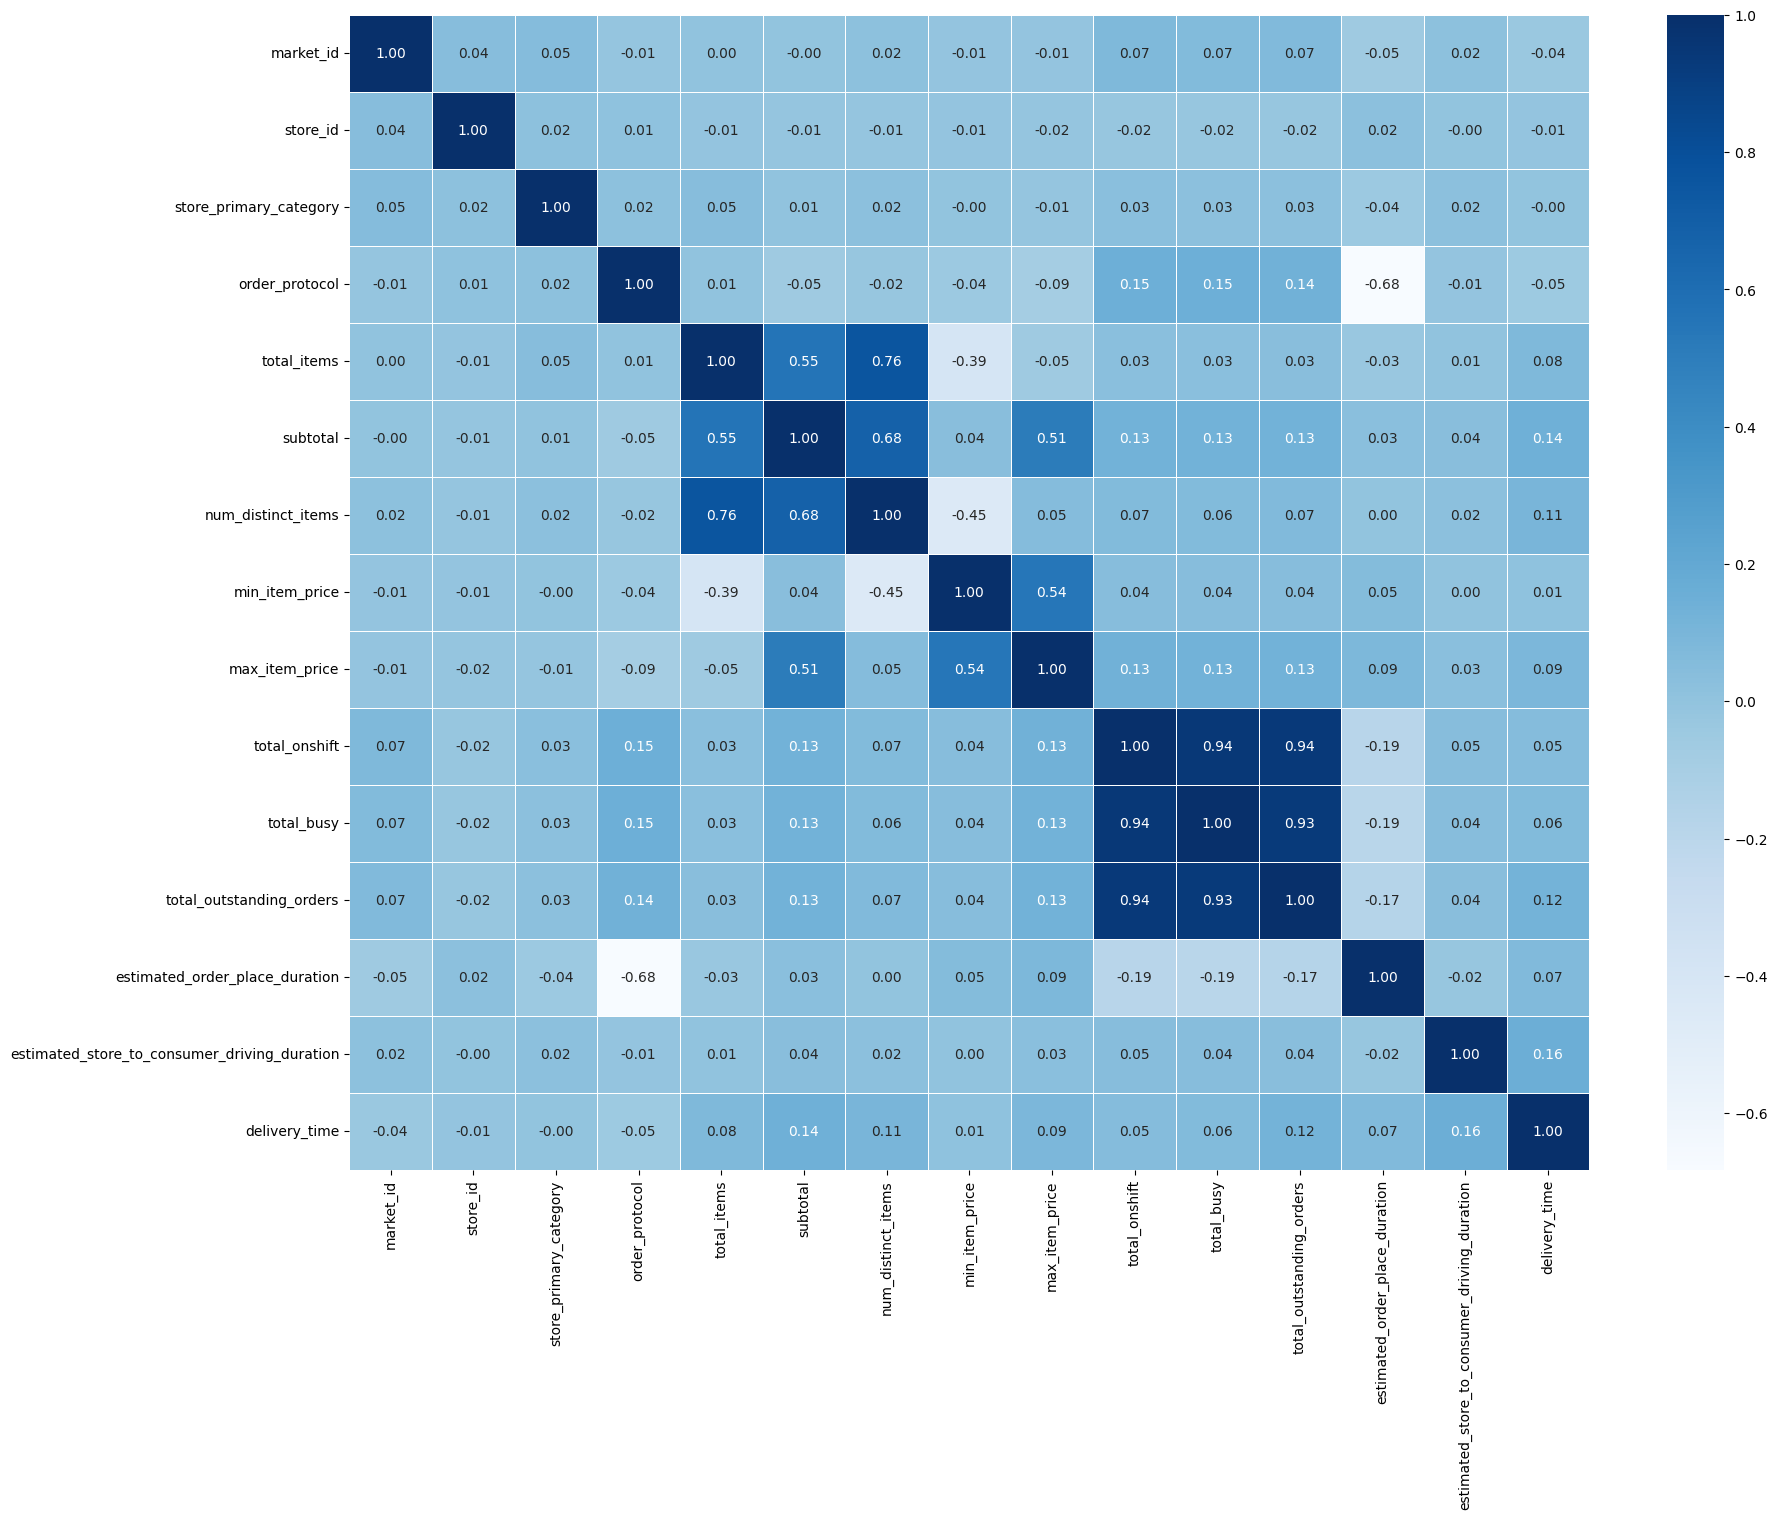

In [16]:
plt.figure(figsize=(20,15))
sns.heatmap(data = df_del.corr(), annot=True, fmt = '.2f', linewidths=.5, cmap='Blues')

In [17]:
df_dataset = df_del[['total_items', 'subtotal', 'num_distinct_items',
                     'min_item_price', 'max_item_price', 'total_onshift', 'total_busy',
                     'total_outstanding_orders', 'delivery_time',
                     'estimated_store_to_consumer_driving_duration']]
df_dataset

total_items  subtotal  num_distinct_items  min_item_price  \
0                 4      3441                   4             557   
1                 1      1900                   1            1400   
2                 4      4771                   3             820   
3                 1      1525                   1            1525   
4                 2      3620                   2            1425   
...             ...       ...                 ...             ...   
175772            3      1389                   3             345   
175773            6      3010                   4             405   
175774            5      1836                   3             300   
175775            1      1175                   1             535   
175776            4      2605                   4             425   

        max_item_price  total_onshift  total_busy  total_outstanding_orders  \
0                 1239           33.0        14.0                      21.0   
1                 1400            1.0         2.0                       2.0   
2                 1604            8.0         6.0                      18.0   
3                 1525            5.0         6.0                       8.0   
4                 2195            5.0         5.0                       7.0   
...                ...            ...         ...                       ...   
175772             649           17.0        17.0                      23.0   
175773             825           12.0        11.0                      14.0   
175774             399           39.0        41.0                      40.0   
175775             535            7.0         7.0                      12.0   
175776             750           20.0        20.0                      23.0   

        delivery_time  estimated_store_to_consumer_driving_duration  
0              3779.0                                         861.0  
1              4024.0                                         690.0  
2              1586.0                                         289.0  
3              2273.0                                         795.0  
4              2988.0                                         205.0  
...               ...                                           ...  
175772         3907.0                                         331.0  
175773         3383.0                                         915.0  
175774         3008.0                                         795.0  
175775         3907.0                                         384.0  
175776         2228.0                                         134.0  

[175777 rows x 10 columns]

In [18]:
from sklearn.model_selection import train_test_split

train_dataset, val_dataset = train_test_split(df_dataset, test_size=0.1)

X_train = train_dataset.drop(labels='delivery_time',axis=1)
y_train = train_dataset['delivery_time']
X_val = val_dataset.drop(labels='delivery_time',axis=1)
y_val = val_dataset['delivery_time']

print('학습 이미지:', X_train.shape)
print('학습 레이블:', y_train.shape)
print('검증 이미지:', X_val.shape)
print('검증 레이블:', y_val.shape)

학습 이미지: (158199, 9)
학습 레이블: (158199,)
검증 이미지: (17578, 9)
검증 레이블: (17578,)


In [19]:
X_train

total_items  subtotal  num_distinct_items  min_item_price  \
58895             1      1400                   1            1400   
66578             4      2300                   3             175   
53475             2       667                   2             206   
86515             3      1813                   3             239   
140975            1       999                   1             999   
...             ...       ...                 ...             ...   
21227             2      1690                   2             450   
17741             4      4120                   4             400   
78927             3      4380                   3             895   
2991              2      1138                   2             479   
58470             1      3200                   1            1700   

        max_item_price  total_onshift  total_busy  total_outstanding_orders  \
58895             1400           53.0        45.0                      55.0   
66578             1025           71.0        71.0                     109.0   
53475              429           11.0        11.0                      14.0   
86515              999           15.0        11.0                      11.0   
140975             999           21.0        13.0                      14.0   
...                ...            ...         ...                       ...   
21227              995           23.0        24.0                      25.0   
17741             2100          100.0       102.0                     205.0   
78927             1595           28.0        31.0                      66.0   
2991               659           11.0        11.0                      12.0   
58470             1700           93.0        81.0                      95.0   

        estimated_store_to_consumer_driving_duration  
58895                                          930.0  
66578                                          594.0  
53475                                          429.0  
86515                                          870.0  
140975                                         451.0  
...                                              ...  
21227                                          578.0  
17741                                           92.0  
78927                                          399.0  
2991                                           533.0  
58470                                          398.0  

[158199 rows x 9 columns]

In [20]:
from sklearn.linear_model import LinearRegression
import time

start_time = time.time() # 시작 시간

model = LinearRegression()
model.fit(X_train, y_train)

print("소요된 시간(초 단위):", time.time() - start_time) # 실행 시간

소요된 시간(초 단위): 0.333892822265625


In [21]:
# - 학습데이터 평가
score = model.score(X_train, y_train)
print(f'Train : {score}')

# - 테스트데이터 평가
score = model.score(X_val, y_val)
print(f'Test : {score}')

Train : 0.09114719030278318
Test : 0.18665991685901273


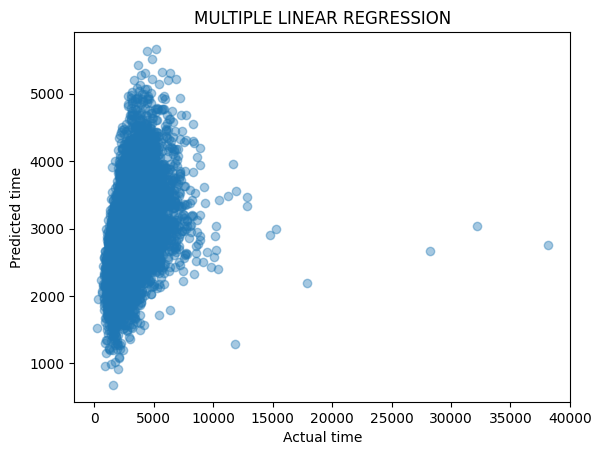

In [22]:
y_predict = model.predict(X_val)

plt.scatter(y_val, y_predict, alpha=0.4)
plt.xlabel("Actual time")
plt.ylabel("Predicted time")
plt.title("MULTIPLE LINEAR REGRESSION")
plt.show()

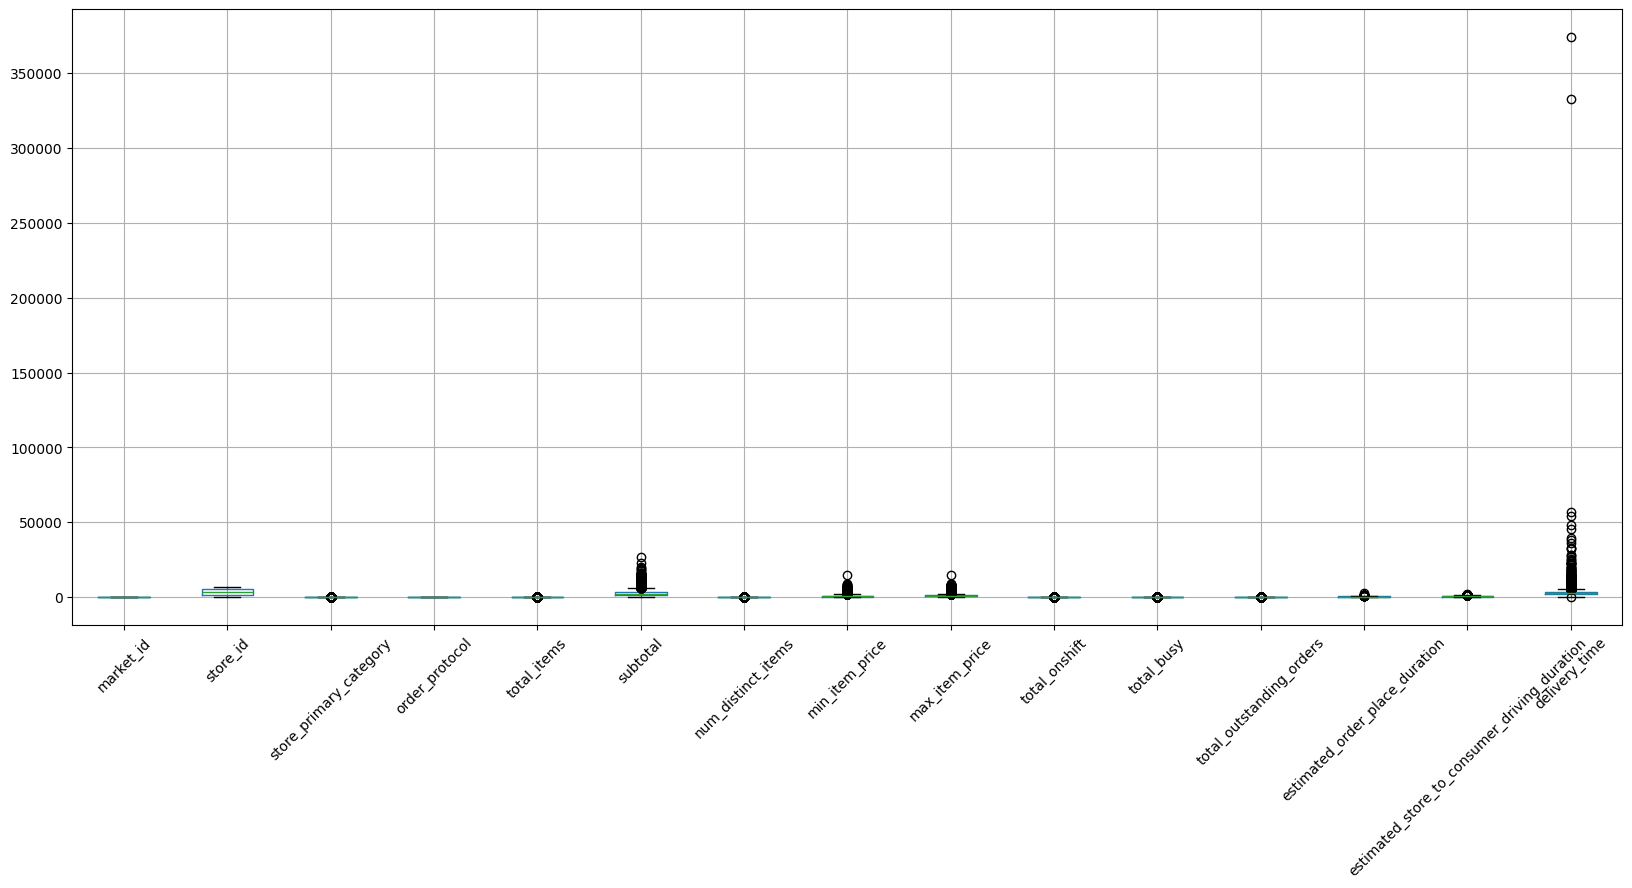

In [23]:
plt.figure(figsize=(20,8))
df_del.boxplot()
plt.xticks(rotation=45)
plt.show()

In [24]:
df_del = df_del[df_del['delivery_time'] <= 7200]

plt.figure(figsize=(20,8))
df_del.boxplot()
plt.xticks(rotation=45)
plt.show()

In [25]:
df_del = df_del[df_del['subtotal'] <= 20000]
df_del = df_del[df_del['min_item_price'] <= 10000]
df_del = df_del[df_del['max_item_price'] <= 10000]

plt.figure(figsize=(20,8))
df_del.boxplot()
plt.xticks(rotation=45)
plt.show()

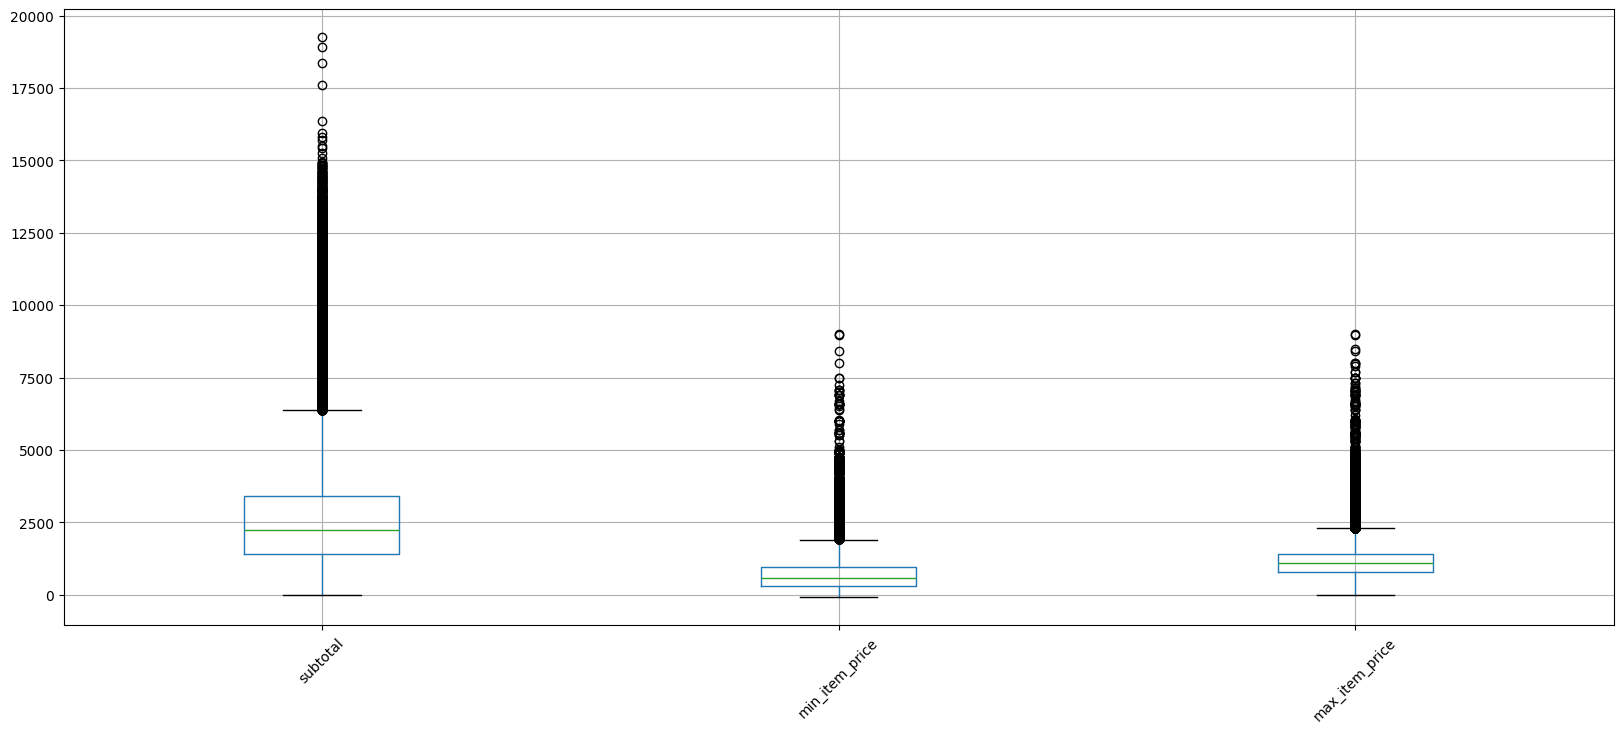

In [26]:
plt.figure(figsize=(20,8))
df_del[['subtotal', 'min_item_price', 'max_item_price']].boxplot()
plt.xticks(rotation=45)
plt.show()

In [27]:
plt.figure(figsize=(20,8))
df_del[['total_items', 'num_distinct_items', 'total_onshift', 'total_busy',
        'total_outstanding_orders']].boxplot()
plt.xticks(rotation=45)
plt.show()

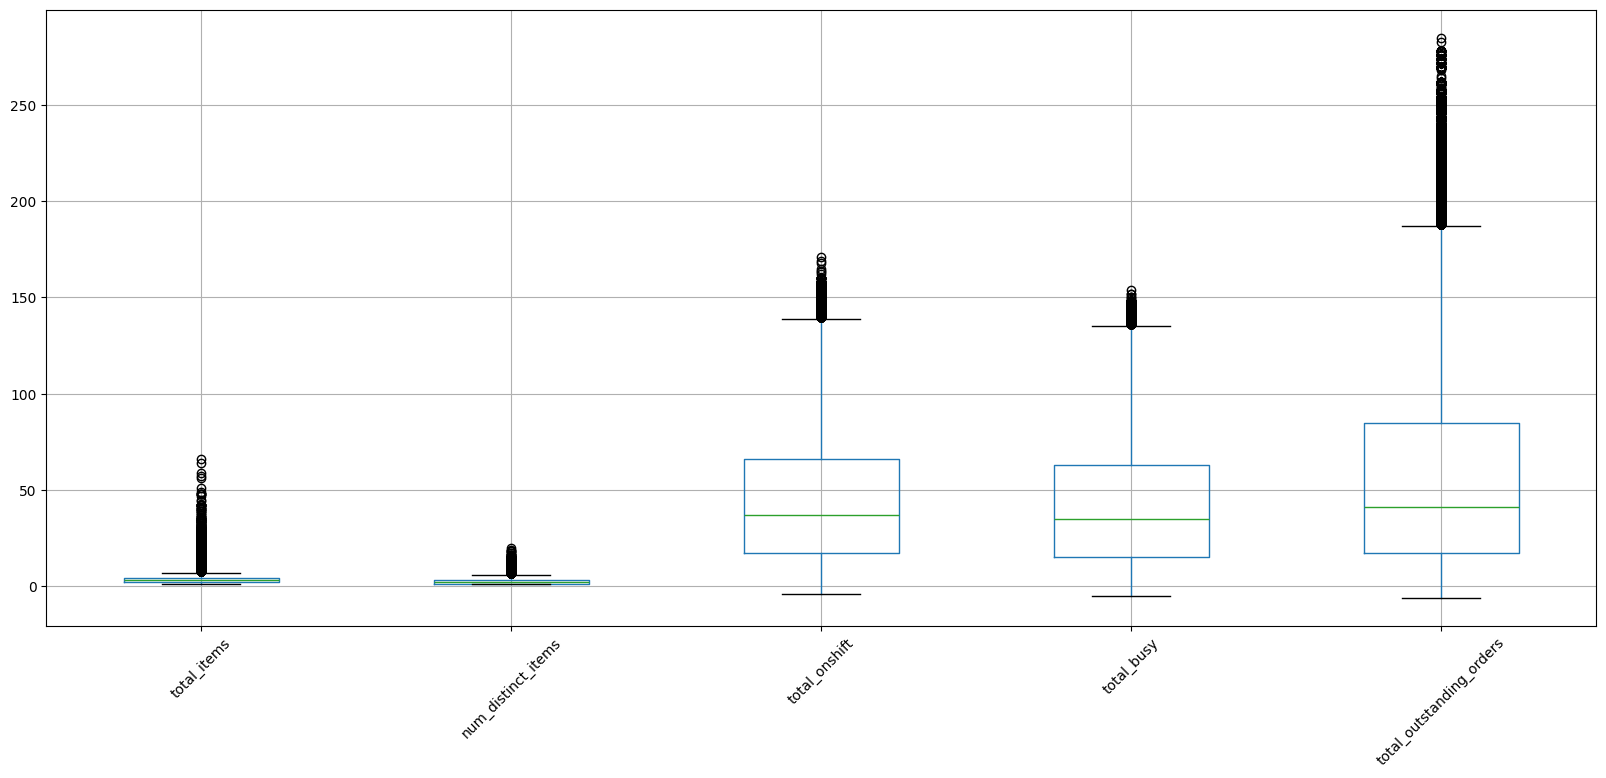

In [28]:
df_del = df_del[df_del['total_items'] <= 100]

plt.figure(figsize=(20,8))
df_del[['total_items', 'num_distinct_items', 'total_onshift', 'total_busy',
        'total_outstanding_orders']].boxplot()
plt.xticks(rotation=45)
plt.show()

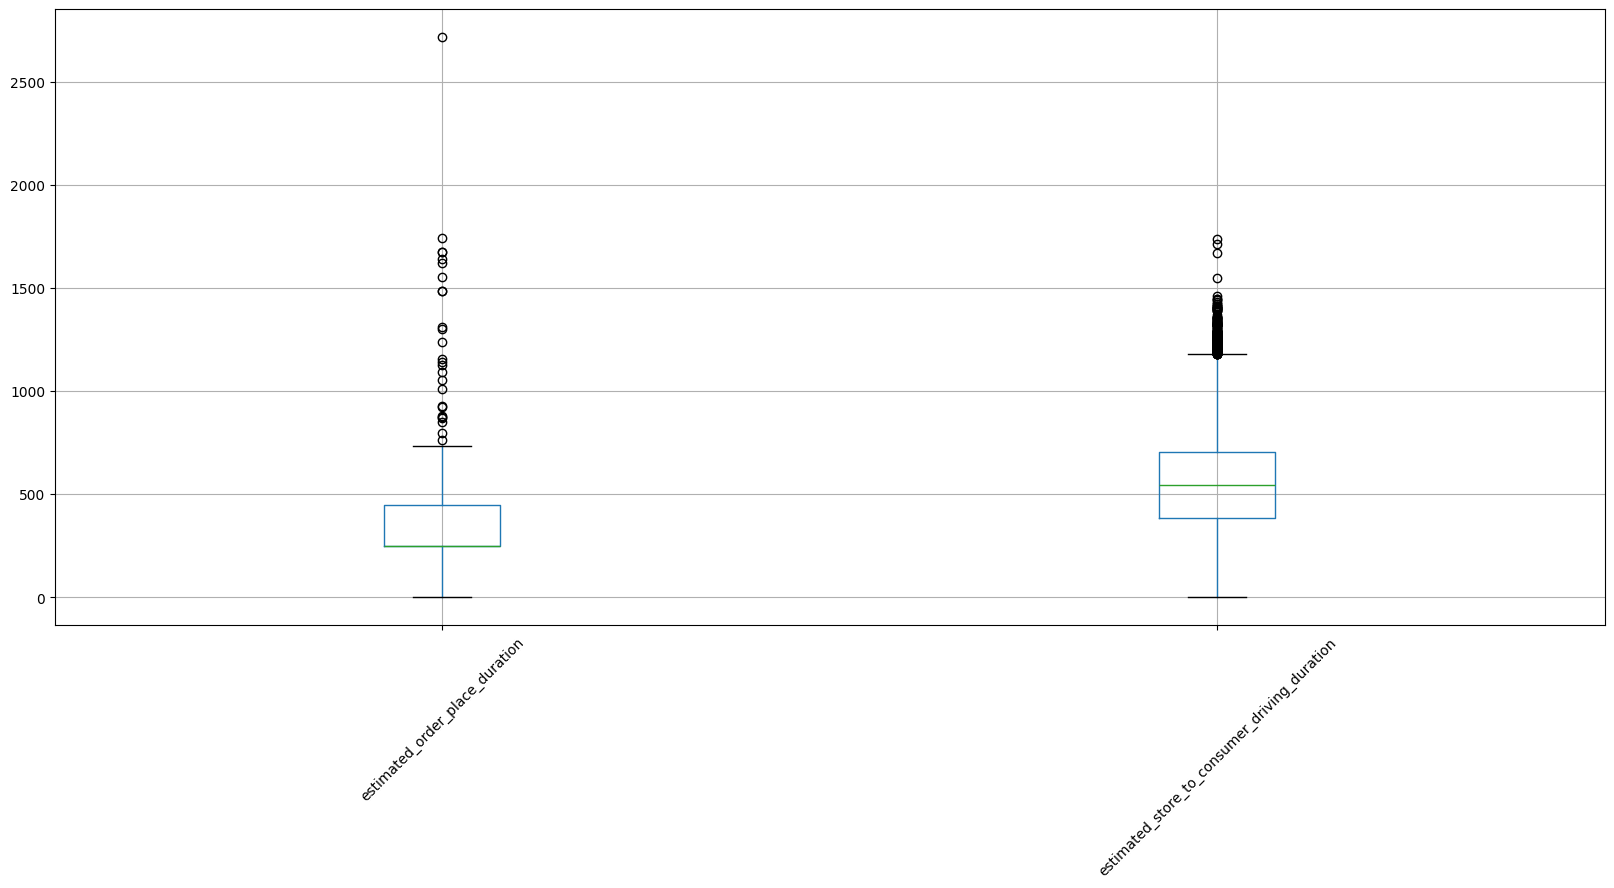

In [29]:
plt.figure(figsize=(20,8))
df_del[['estimated_order_place_duration',
        'estimated_store_to_consumer_driving_duration']].boxplot()
plt.xticks(rotation=45)
plt.show()

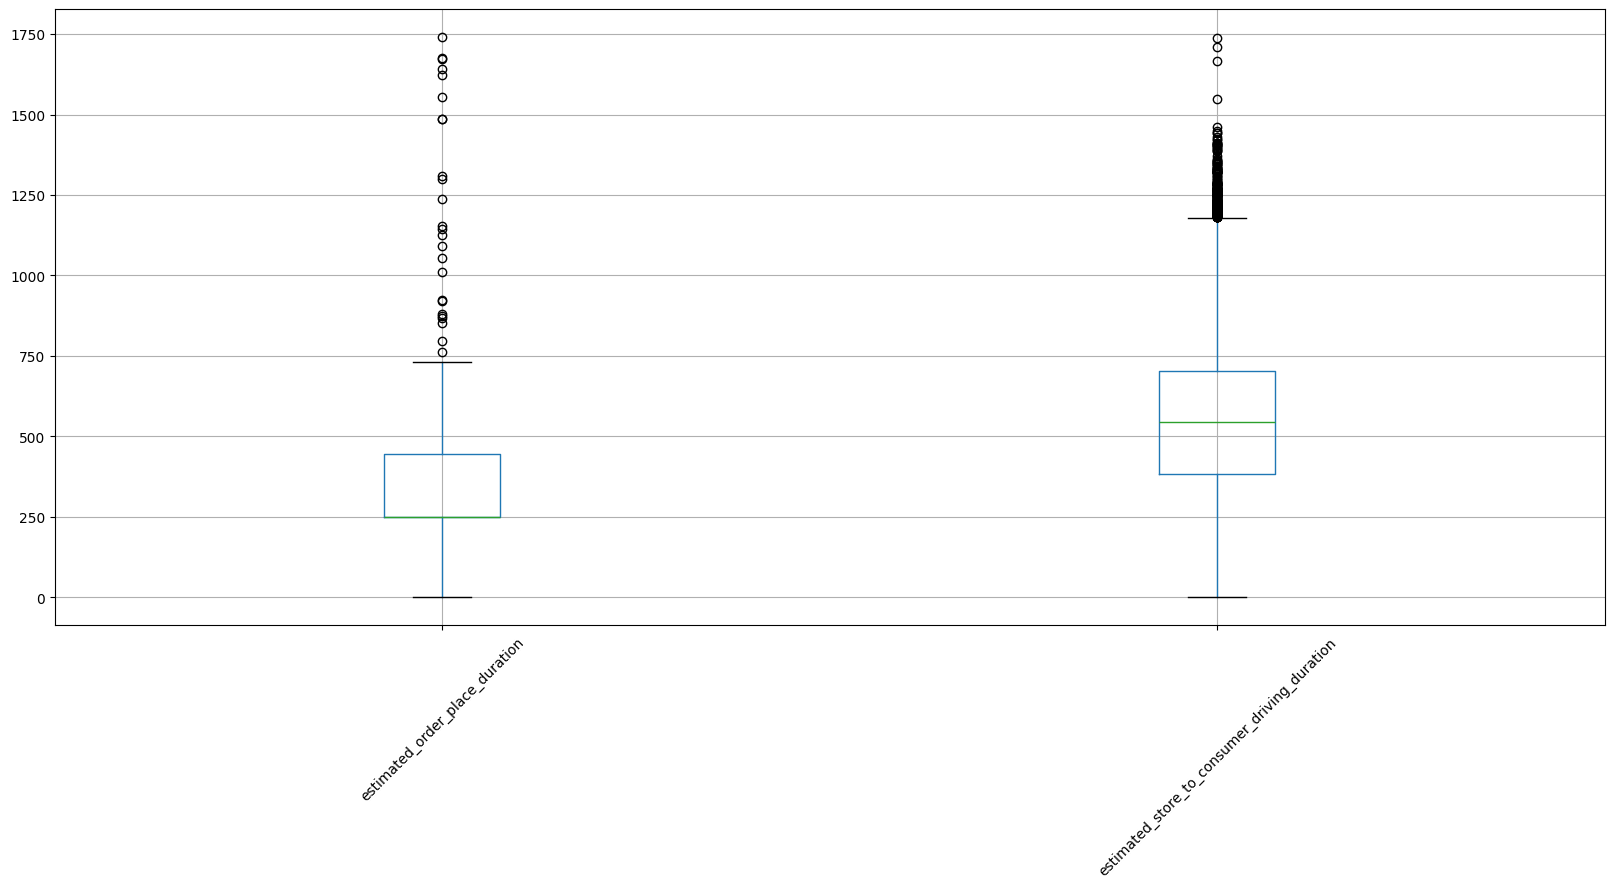

In [30]:
df_del = df_del[df_del['estimated_order_place_duration'] <= 2500]

plt.figure(figsize=(20,8))
df_del[['estimated_order_place_duration',
        'estimated_store_to_consumer_driving_duration']].boxplot()
plt.xticks(rotation=45)
plt.show()

In [31]:
df_del

market_id  store_id  store_primary_category  order_protocol  \
0             1.0      1845                       0             1.0   
1             2.0      5477                       1             2.0   
2             2.0      5477                       2             3.0   
3             1.0      2841                       3             1.0   
4             1.0      2841                       3             1.0   
...           ...       ...                     ...             ...   
175772        1.0      2956                      23             4.0   
175773        1.0      2956                      23             4.0   
175774        1.0      2956                      23             4.0   
175775        1.0      3630                       4             1.0   
175776        1.0      3630                       4             1.0   

        total_items  subtotal  num_distinct_items  min_item_price  \
0                 4      3441                   4             557   
1                 1      1900                   1            1400   
2                 4      4771                   3             820   
3                 1      1525                   1            1525   
4                 2      3620                   2            1425   
...             ...       ...                 ...             ...   
175772            3      1389                   3             345   
175773            6      3010                   4             405   
175774            5      1836                   3             300   
175775            1      1175                   1             535   
175776            4      2605                   4             425   

        max_item_price  total_onshift  total_busy  total_outstanding_orders  \
0                 1239           33.0        14.0                      21.0   
1                 1400            1.0         2.0                       2.0   
2                 1604            8.0         6.0                      18.0   
3                 1525            5.0         6.0                       8.0   
4                 2195            5.0         5.0                       7.0   
...                ...            ...         ...                       ...   
175772             649           17.0        17.0                      23.0   
175773             825           12.0        11.0                      14.0   
175774             399           39.0        41.0                      40.0   
175775             535            7.0         7.0                      12.0   
175776             750           20.0        20.0                      23.0   

        estimated_order_place_duration  \
0                                  446   
1                                  446   
2                                  446   
3                                  446   
4                                  446   
...                                ...   
175772                             251   
175773                             251   
175774                             251   
175775                             446   
175776                             446   

        estimated_store_to_consumer_driving_duration  delivery_time  
0                                              861.0         3779.0  
1                                              690.0         4024.0  
2                                              289.0         1586.0  
3                                              795.0         2273.0  
4                                              205.0         2988.0  
...                                              ...            ...  
175772                                         331.0         3907.0  
175773                                         915.0         3383.0  
175774                                         795.0         3008.0  
175775                                         384.0         3907.0  
175776                                         134.0         2228.0  

[174798 rows x 15 columns]

In [32]:
df_del.reset_index(drop=False, inplace=True)
df_del = df_del.drop(labels=['index'],axis=1)
df_del

market_id  store_id  store_primary_category  order_protocol  \
0             1.0      1845                       0             1.0   
1             2.0      5477                       1             2.0   
2             2.0      5477                       2             3.0   
3             1.0      2841                       3             1.0   
4             1.0      2841                       3             1.0   
...           ...       ...                     ...             ...   
174793        1.0      2956                      23             4.0   
174794        1.0      2956                      23             4.0   
174795        1.0      2956                      23             4.0   
174796        1.0      3630                       4             1.0   
174797        1.0      3630                       4             1.0   

        total_items  subtotal  num_distinct_items  min_item_price  \
0                 4      3441                   4             557   
1                 1      1900                   1            1400   
2                 4      4771                   3             820   
3                 1      1525                   1            1525   
4                 2      3620                   2            1425   
...             ...       ...                 ...             ...   
174793            3      1389                   3             345   
174794            6      3010                   4             405   
174795            5      1836                   3             300   
174796            1      1175                   1             535   
174797            4      2605                   4             425   

        max_item_price  total_onshift  total_busy  total_outstanding_orders  \
0                 1239           33.0        14.0                      21.0   
1                 1400            1.0         2.0                       2.0   
2                 1604            8.0         6.0                      18.0   
3                 1525            5.0         6.0                       8.0   
4                 2195            5.0         5.0                       7.0   
...                ...            ...         ...                       ...   
174793             649           17.0        17.0                      23.0   
174794             825           12.0        11.0                      14.0   
174795             399           39.0        41.0                      40.0   
174796             535            7.0         7.0                      12.0   
174797             750           20.0        20.0                      23.0   

        estimated_order_place_duration  \
0                                  446   
1                                  446   
2                                  446   
3                                  446   
4                                  446   
...                                ...   
174793                             251   
174794                             251   
174795                             251   
174796                             446   
174797                             446   

        estimated_store_to_consumer_driving_duration  delivery_time  
0                                              861.0         3779.0  
1                                              690.0         4024.0  
2                                              289.0         1586.0  
3                                              795.0         2273.0  
4                                              205.0         2988.0  
...                                              ...            ...  
174793                                         331.0         3907.0  
174794                                         915.0         3383.0  
174795                                         795.0         3008.0  
174796                                         384.0         3907.0  
174797                                         134.0         2228.0  

[174798 rows x 15 columns]

In [33]:
df_dataset = df_del[['total_items', 'subtotal', 'num_distinct_items',
                     'min_item_price', 'max_item_price', 'total_onshift',
                     'total_busy', 'total_outstanding_orders',
                     'estimated_store_to_consumer_driving_duration', 'delivery_time']]
df_dataset

total_items  subtotal  num_distinct_items  min_item_price  \
0                 4      3441                   4             557   
1                 1      1900                   1            1400   
2                 4      4771                   3             820   
3                 1      1525                   1            1525   
4                 2      3620                   2            1425   
...             ...       ...                 ...             ...   
174793            3      1389                   3             345   
174794            6      3010                   4             405   
174795            5      1836                   3             300   
174796            1      1175                   1             535   
174797            4      2605                   4             425   

        max_item_price  total_onshift  total_busy  total_outstanding_orders  \
0                 1239           33.0        14.0                      21.0   
1                 1400            1.0         2.0                       2.0   
2                 1604            8.0         6.0                      18.0   
3                 1525            5.0         6.0                       8.0   
4                 2195            5.0         5.0                       7.0   
...                ...            ...         ...                       ...   
174793             649           17.0        17.0                      23.0   
174794             825           12.0        11.0                      14.0   
174795             399           39.0        41.0                      40.0   
174796             535            7.0         7.0                      12.0   
174797             750           20.0        20.0                      23.0   

        estimated_store_to_consumer_driving_duration  delivery_time  
0                                              861.0         3779.0  
1                                              690.0         4024.0  
2                                              289.0         1586.0  
3                                              795.0         2273.0  
4                                              205.0         2988.0  
...                                              ...            ...  
174793                                         331.0         3907.0  
174794                                         915.0         3383.0  
174795                                         795.0         3008.0  
174796                                         384.0         3907.0  
174797                                         134.0         2228.0  

[174798 rows x 10 columns]

In [34]:
from sklearn.model_selection import train_test_split

train_dataset, val_dataset = train_test_split(df_dataset, test_size=0.1)

X_train = train_dataset.drop(labels='delivery_time',axis=1)
y_train = train_dataset['delivery_time']
X_val = val_dataset.drop(labels='delivery_time',axis=1)
y_val = val_dataset['delivery_time']

print('학습 이미지:', X_train.shape)
print('학습 레이블:', y_train.shape)
print('검증 이미지:', X_val.shape)
print('검증 레이블:', y_val.shape)

학습 이미지: (157318, 9)
학습 레이블: (157318,)
검증 이미지: (17480, 9)
검증 레이블: (17480,)


In [35]:
X_train

total_items  subtotal  num_distinct_items  min_item_price  \
94032             4      4104                   4             738   
8876              3      2625                   2             625   
45192             2       410                   1             110   
120903            2      4206                   2              69   
120403            2      2100                   2            1050   
...             ...       ...                 ...             ...   
34165            11      6629                   7              99   
164408            1       898                   1             797   
78476             1      1295                   1            1295   
137331            3      3285                   2             995   
173325            3      2277                   3             399   

        max_item_price  total_onshift  total_busy  total_outstanding_orders  \
94032             1403          111.0       107.0                     191.0   
8876              1000           49.0        32.0                      38.0   
45192              110            0.0         0.0                       0.0   
120903            3999            4.0         4.0                       3.0   
120403            1050           18.0        14.0                      14.0   
...                ...            ...         ...                       ...   
34165             1199           76.0        62.0                     108.0   
164408             797           34.0        32.0                      41.0   
78476             1295           21.0        24.0                      23.0   
137331            1295           31.0        31.0                      45.0   
173325            1399           15.0        12.0                      17.0   

        estimated_store_to_consumer_driving_duration  
94032                                          543.0  
8876                                           373.0  
45192                                          813.0  
120903                                         571.0  
120403                                         795.0  
...                                              ...  
34165                                          375.0  
164408                                         406.0  
78476                                          622.0  
137331                                         561.0  
173325                                         929.0  

[157318 rows x 9 columns]

In [36]:
from sklearn.linear_model import LinearRegression
import time

start_time = time.time() # 시작 시간

model = LinearRegression()
model.fit(X_train, y_train)

print("소요된 시간(초 단위):", time.time() - start_time) # 실행 시간

소요된 시간(초 단위): 0.04099607467651367


In [37]:
# - 학습데이터 평가
score = model.score(X_train, y_train)
print(f'Train : {score}')

# - 테스트데이터 평가
score = model.score(X_val, y_val)
print(f'Test : {score}')

Train : 0.23343566525998638
Test : 0.2405159021425063


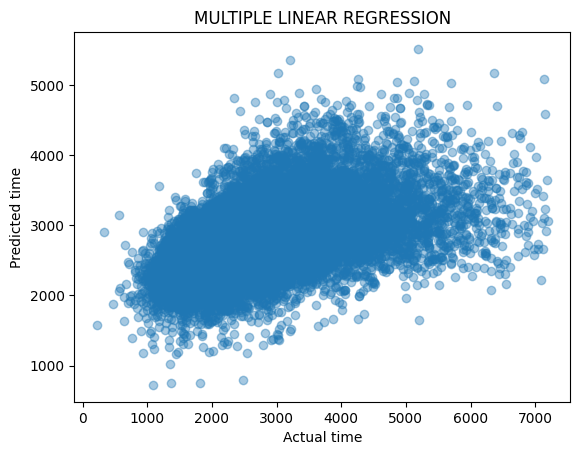

In [38]:
y_predict = model.predict(X_val)

plt.scatter(y_val, y_predict, alpha=0.4)
plt.xlabel("Actual time")
plt.ylabel("Predicted time")
plt.title("MULTIPLE LINEAR REGRESSION")
plt.show()

In [39]:
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

# 예제 데이터 생성
X = df_dataset.drop(labels='delivery_time',axis=1)
y = df_dataset['delivery_time']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=42)

# SGDRegressor 모델 생성
model = SGDRegressor(alpha=0.01, max_iter=1000, random_state=42)

# 모델 학습
model.fit(X_train, y_train)

# 모델을 사용하여 예측 수행
y_pred = model.predict(X_val)

# 성능 지표 계산
mse = mean_squared_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)

print("MSE:", mse)
print("R-squared:", r2)

MSE: 4.6790488523928685e+29
R-squared: -4.579318795744918e+23


In [40]:
num_iterations = 100
mse_scores = []
r2_scores = []

for i in range(num_iterations):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=42)
    
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_val)

    mse = mean_squared_error(y_val, y_pred)
    r2 = r2_score(y_val, y_pred)
    
    # 성능 지표를 리스트에 추가
    mse_scores.append(mse)
    r2_scores.append(r2)

# 평균 성능 출력
average_mse = np.mean(mse_scores)
average_r2 = np.mean(r2_scores)

print("평균 MSE:", average_mse)
print("평균 R-squared:", average_r2)

평균 MSE: 785014.7343854951
평균 R-squared: 0.23171720545943814


In [41]:
from sklearn.linear_model import Ridge
    
# 다항 회귀 적용
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

X_train, X_val, y_train, y_val = train_test_split(X_poly, y, test_size=0.1, random_state=42)

model = Ridge(alpha=1.0)
model.fit(X_train, y_train)

# 모델을 사용하여 예측 수행
y_pred = model.predict(X_val)

# 성능 지표 계산
mse = mean_squared_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)

print("MSE:", mse)
print("R-squared:", r2)

MSE: 748993.1323291362
R-squared: 0.26697103685834944


/home/user/ml/venv/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=1.48863e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


In [42]:
from sklearn.linear_model import Lasso

X_train, X_val, y_train, y_val = train_test_split(X_poly, y, test_size=0.1, random_state=42)

model = Lasso(alpha=1.0)
model.fit(X_train, y_train)

# 모델을 사용하여 예측 수행
y_pred = model.predict(X_val)

# 성능 지표 계산
mse = mean_squared_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)

print("MSE:", mse)
print("R-squared:", r2)

MSE: 750372.6981282226
R-squared: 0.2656208753633499


/home/user/ml/venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.938e+10, tolerance: 1.620e+07
  model = cd_fast.enet_coordinate_descent(


In [43]:
from sklearn.model_selection import GridSearchCV

# 예제 데이터 생성
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

X_train, X_val, y_train, y_val = train_test_split(X_poly, y, test_size=0.1, random_state=42)

model = Lasso(alpha=0.1)
model.fit(X_train, y_train)

# 모델을 사용하여 예측 수행
y_pred = model.predict(X_val)

# 성능 지표 계산
mse = mean_squared_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)

print("MSE:", mse)
print("R-squared:", r2)

print('학습 평가 : ', model.score(X_train, y_train))
print('검증 평가 : ', model.score(X_val, y_val))

MSE: 750329.8818756602
R-squared: 0.2656627790228987
학습 평가 :  0.26711590730065515
검증 평가 :  0.2656627790228987


/home/user/ml/venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.936e+10, tolerance: 1.620e+07
  model = cd_fast.enet_coordinate_descent(


In [44]:
from sklearn.model_selection import GridSearchCV

# 예제 데이터 생성
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

X_train, X_val, y_train, y_val = train_test_split(X_poly, y, test_size=0.1, random_state=42)

# Ridge 모델 생성
#model = Lasso()
model = Ridge(alpha=1000)
model.fit(X_train, y_train)

# 모델을 사용하여 예측 수행
y_pred = model.predict(X_val)

# 성능 지표 계산
mse = mean_squared_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)

print("MSE:", mse)
print("R-squared:", r2)

print('학습 평가 : ', model.score(X_train, y_train))
print('검증 평가 : ', model.score(X_val, y_val))

MSE: 749002.2052021564
R-squared: 0.2669621573661144
학습 평가 :  0.26865313670613455
검증 평가 :  0.2669621573661144


/home/user/ml/venv/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=1.48863e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


In [45]:
# 가중치 확인
coefficients = model.coef_

# 가중치 시각화
plt.figure(figsize=(8, 4))
plt.bar(range(len(coefficients)), coefficients)
plt.xticks(range(len(coefficients)), labels=list(range(1, len(coefficients)+1)))
plt.xlabel("Features")
plt.ylabel("Coefficients")
plt.title("Feature Coefficients in Ridge Regression")
plt.show()

In [46]:
coefficients

array([ 0.00000000e+00,  1.24143584e+01,  8.67118079e-02,  2.15415582e+01,
        2.04316053e-02,  1.97267436e-01, -5.21989228e+01, -2.16048568e+01,
        4.85722602e+01,  1.35478646e+00, -9.53208086e-02, -3.42876936e-04,
        3.47914160e-01, -7.85129323e-03,  2.58717668e-03,  1.31007261e-01,
        3.43114086e-02, -1.31536400e-01, -2.69916880e-02,  1.72064460e-06,
       -1.80291044e-03, -4.69432444e-06, -7.97997495e-06,  3.79097377e-04,
        1.80519527e-04, -5.35591391e-04,  2.58676423e-05,  2.04898425e+00,
       -8.25537006e-04, -6.68235774e-03, -2.86178415e-01, -1.30602316e-02,
        2.60358826e-01,  2.82435706e-03, -7.61350506e-05,  8.77655086e-05,
        6.64126622e-04,  1.11163136e-03, -9.72594580e-04, -4.38671491e-05,
       -2.30755854e-05,  1.23923402e-03, -2.02423141e-03,  4.15979925e-04,
       -5.55944821e-05,  3.40530040e-01,  2.60085494e-01, -3.97782705e-01,
       -3.17468954e-03,  1.12109988e-01, -1.81621944e-01,  6.75930538e-04,
        8.01018194e-02,  

In [47]:
plt.figure(figsize=(20,15))
sns.heatmap(data = df_dataset.corr(), annot=True, fmt = '.2f', linewidths=.5, cmap='Blues')

<Axes: >

In [48]:
df_dataset2 = df_del[['subtotal', 'num_distinct_items', 'max_item_price', 'total_onshift', 'total_busy', 'estimated_order_place_duration', 'delivery_time']]
plt.figure(figsize=(20,15))
sns.heatmap(data = df_dataset2.corr(), annot=True, fmt = '.2f', linewidths=.5, cmap='Blues')

<Axes: >

In [49]:
from sklearn.model_selection import train_test_split

train_dataset, val_dataset = train_test_split(df_dataset2, test_size=0.1)

X_train = train_dataset.drop(labels='delivery_time',axis=1)
y_train = train_dataset['delivery_time']
X_val = val_dataset.drop(labels='delivery_time',axis=1)
y_val = val_dataset['delivery_time']

print('학습 이미지:', X_train.shape)
print('학습 레이블:', y_train.shape)
print('검증 이미지:', X_val.shape)
print('검증 레이블:', y_val.shape)

학습 이미지: (157318, 6)
학습 레이블: (157318,)
검증 이미지: (17480, 6)
검증 레이블: (17480,)


In [50]:
from sklearn.linear_model import LinearRegression
import time

start_time = time.time() # 시작 시간

model = LinearRegression()
model.fit(X_train, y_train)

print("소요된 시간(초 단위):", time.time() - start_time) # 실행 시간

소요된 시간(초 단위): 0.07146215438842773


In [51]:
# - 학습데이터 평가
score = model.score(X_train, y_train)
print(f'Train : {score}')

# - 테스트데이터 평가
score = model.score(X_val, y_val)
print(f'Test : {score}')

Train : 0.0768874075260132
Test : 0.07943918579387588


In [52]:
y_predict = model.predict(X_val)

plt.scatter(y_val, y_predict, alpha=0.4)
plt.xlabel("Actual time")
plt.ylabel("Predicted time")
plt.title("MULTIPLE LINEAR REGRESSION")
plt.show()

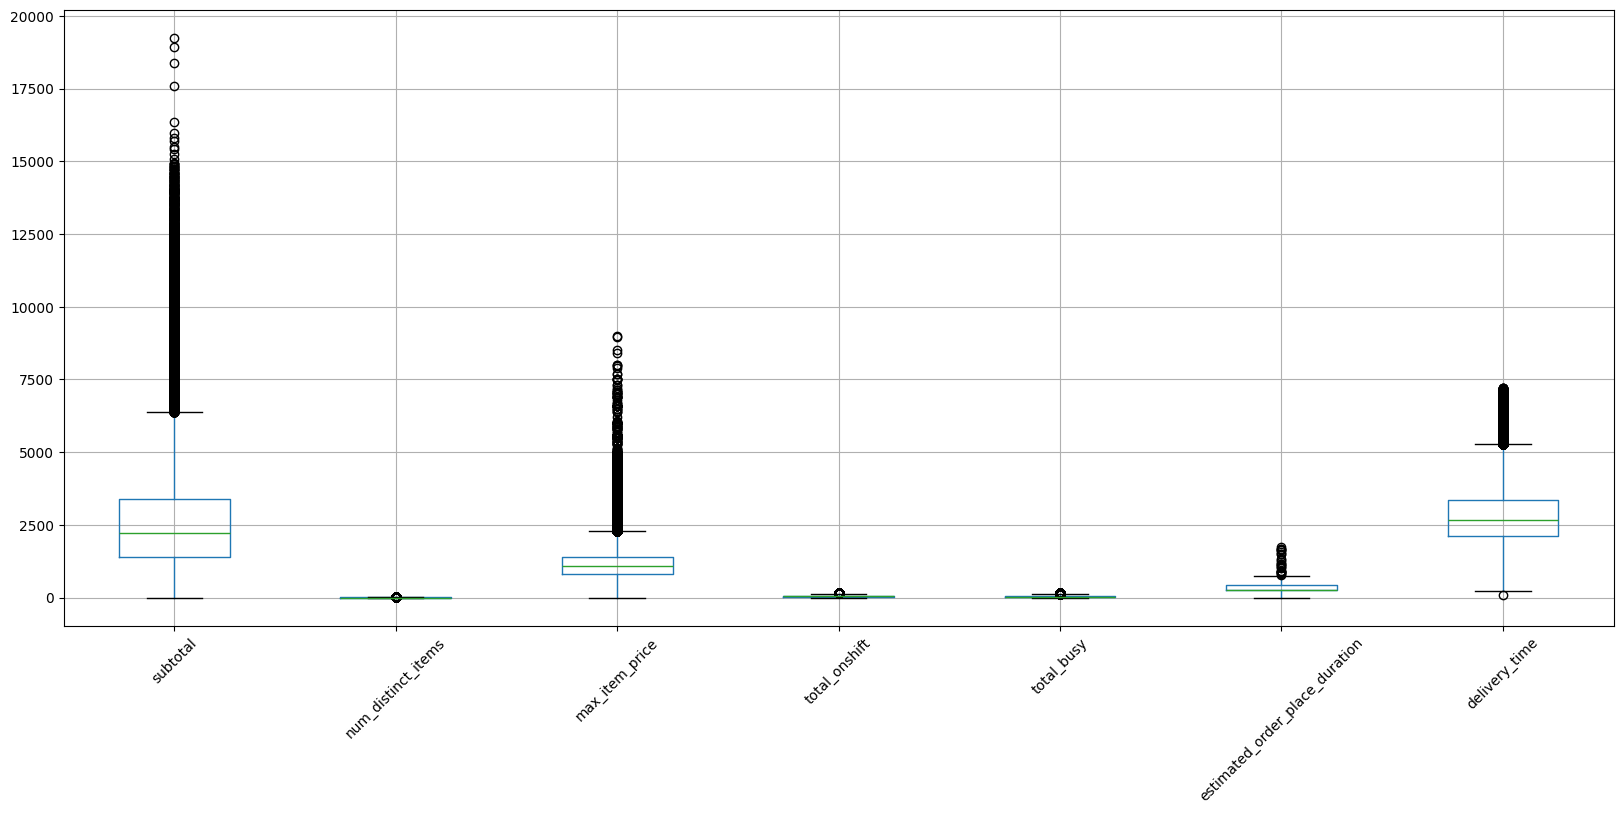

In [53]:

plt.figure(figsize=(20,8))
df_dataset2.boxplot()
plt.xticks(rotation=45)
plt.show()

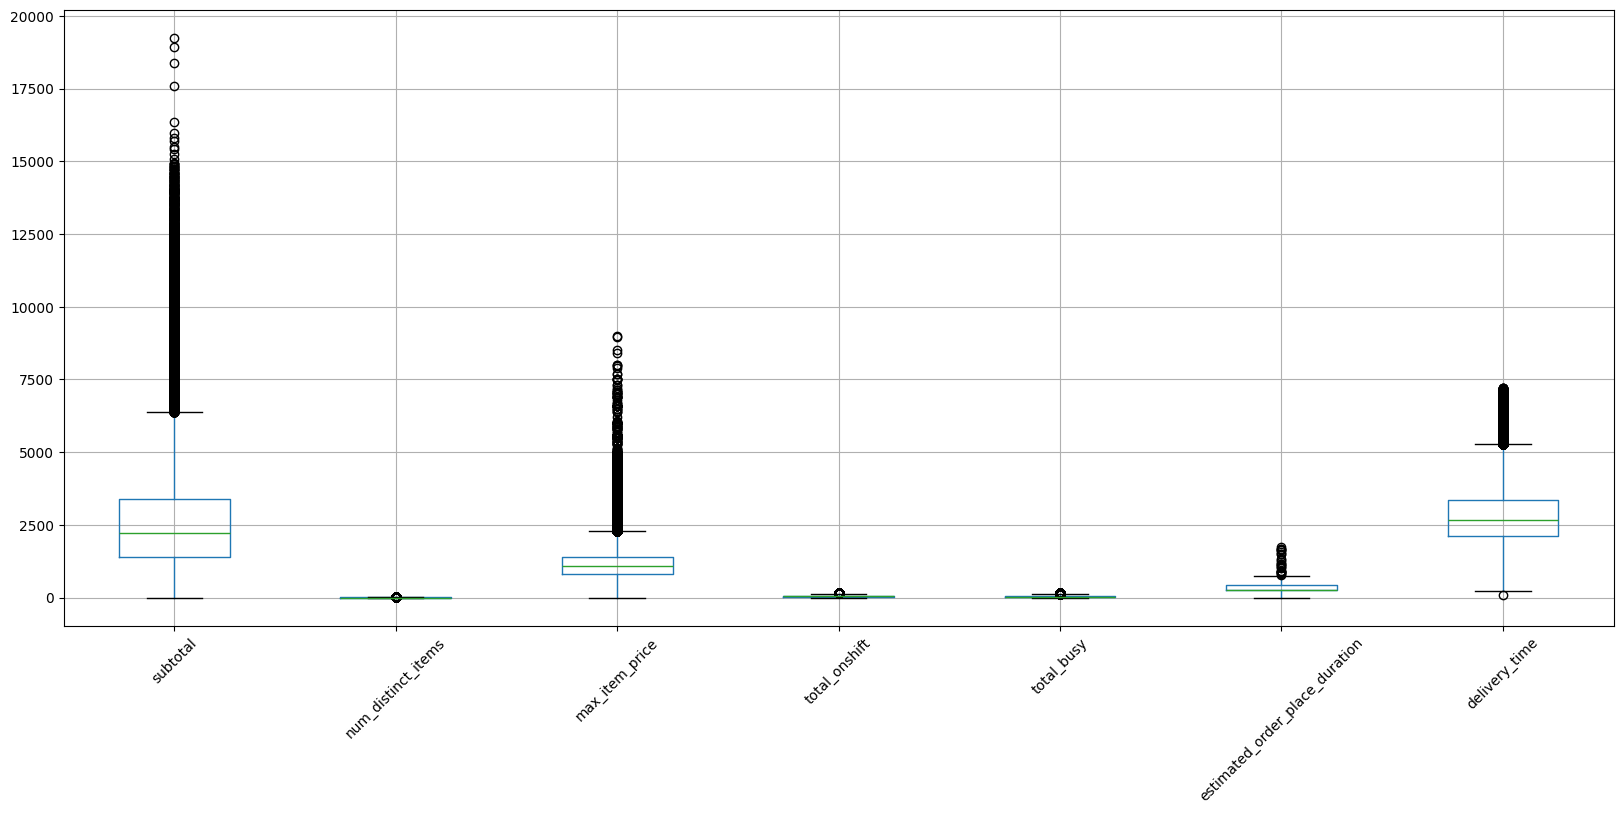

In [54]:
df_dataset2 = df_dataset2[df_dataset2['delivery_time'] <= 7200]

plt.figure(figsize=(20,8))
df_dataset2.boxplot()
plt.xticks(rotation=45)
plt.show()

In [55]:
from sklearn.model_selection import train_test_split

train_dataset, val_dataset = train_test_split(df_dataset2, test_size=0.1)

X_train = train_dataset.drop(labels='delivery_time',axis=1)
y_train = train_dataset['delivery_time']
X_val = val_dataset.drop(labels='delivery_time',axis=1)
y_val = val_dataset['delivery_time']

print('학습 이미지:', X_train.shape)
print('학습 레이블:', y_train.shape)
print('검증 이미지:', X_val.shape)
print('검증 레이블:', y_val.shape)

학습 이미지: (157318, 6)
학습 레이블: (157318,)
검증 이미지: (17480, 6)
검증 레이블: (17480,)


In [56]:
start_time = time.time() # 시작 시간

model = LinearRegression()
model.fit(X_train, y_train)

print("소요된 시간(초 단위):", time.time() - start_time) # 실행 시간

소요된 시간(초 단위): 0.02717137336730957


In [57]:
# - 학습데이터 평가
score = model.score(X_train, y_train)
print(f'Train : {score}')

# - 테스트데이터 평가
score = model.score(X_val, y_val)
print(f'Test : {score}')

Train : 0.07708798256533711
Test : 0.07759107966172663


In [58]:
y_predict = model.predict(X_val)

plt.scatter(y_val, y_predict, alpha=0.4)
plt.xlabel("Actual time")
plt.ylabel("Predicted time")
plt.title("MULTIPLE LINEAR REGRESSION")
plt.show()

In [59]:
from sklearn.model_selection import train_test_split

train_dataset, val_dataset = train_test_split(df_del, test_size=0.1)

X_train = train_dataset.drop(labels='delivery_time',axis=1)
y_train = train_dataset['delivery_time']
X_val = val_dataset.drop(labels='delivery_time',axis=1)
y_val = val_dataset['delivery_time']

print('학습 이미지:', X_train.shape)
print('학습 레이블:', y_train.shape)
print('검증 이미지:', X_val.shape)
print('검증 레이블:', y_val.shape)

학습 이미지: (157318, 14)
학습 레이블: (157318,)
검증 이미지: (17480, 14)
검증 레이블: (17480,)


In [60]:
start_time = time.time() # 시작 시간

model = LinearRegression()
model.fit(X_train, y_train)

print("소요된 시간(초 단위):", time.time() - start_time) # 실행 시간

소요된 시간(초 단위): 0.07112574577331543


In [61]:
# - 학습데이터 평가
score = model.score(X_train, y_train)
print(f'Train : {score}')

# - 테스트데이터 평가
score = model.score(X_val, y_val)
print(f'Test : {score}')

Train : 0.24922589345263568
Test : 0.256272274130084


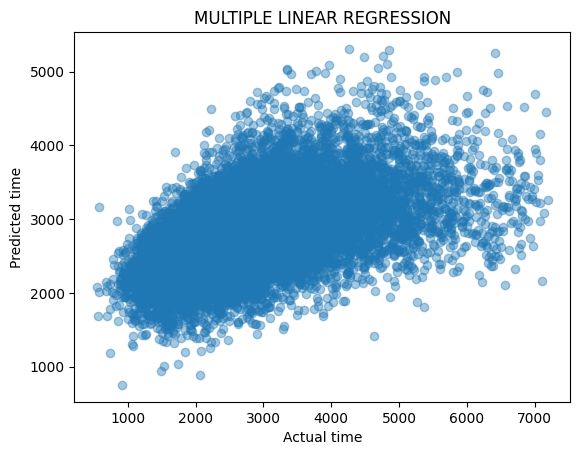

In [62]:
y_predict = model.predict(X_val)

plt.scatter(y_val, y_predict, alpha=0.4)
plt.xlabel("Actual time")
plt.ylabel("Predicted time")
plt.title("MULTIPLE LINEAR REGRESSION")
plt.show()

In [63]:
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

# 예제 데이터 생성
X = df_del.drop(labels='delivery_time',axis=1)
y = df_del['delivery_time']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=42)

# SGDRegressor 모델 생성
model = SGDRegressor(alpha=0.01, max_iter=1000, random_state=42)

# 모델 학습
model.fit(X_train, y_train)

# 모델을 사용하여 예측 수행
y_pred = model.predict(X_val)

# 성능 지표 계산
mse = mean_squared_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)

print("MSE:", mse)
print("R-squared:", r2)

MSE: 1.6097111782913525e+31
R-squared: -1.5754015157804048e+25


In [64]:
num_iterations = 100
mse_scores = []
r2_scores = []

for i in range(num_iterations):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=42)
    
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_val)

    mse = mean_squared_error(y_val, y_pred)
    r2 = r2_score(y_val, y_pred)
    
    # 성능 지표를 리스트에 추가
    mse_scores.append(mse)
    r2_scores.append(r2)

# 평균 성능 출력
average_mse = np.mean(mse_scores)
average_r2 = np.mean(r2_scores)

print("평균 MSE:", average_mse)
print("평균 R-squared:", average_r2)

평균 MSE: 766859.3235995385
평균 R-squared: 0.24948564867927825


In [65]:
from sklearn.linear_model import Ridge
    
# 다항 회귀 적용
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

X_train, X_val, y_train, y_val = train_test_split(X_poly, y, test_size=0.1, random_state=42)

model = Ridge(alpha=1.0)
model.fit(X_train, y_train)

# 모델을 사용하여 예측 수행
y_pred = model.predict(X_val)

# 성능 지표 계산
mse = mean_squared_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)

print("MSE:", mse)
print("R-squared:", r2)

MSE: 720416.3558190342
R-squared: 0.2949387230105446


/home/user/ml/venv/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=1.13701e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


In [66]:
from sklearn.linear_model import Lasso

X_train, X_val, y_train, y_val = train_test_split(X_poly, y, test_size=0.1, random_state=42)

model = Lasso(alpha=1.0)
model.fit(X_train, y_train)

# 모델을 사용하여 예측 수행
y_pred = model.predict(X_val)

# 성능 지표 계산
mse = mean_squared_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)

print("MSE:", mse)
print("R-squared:", r2)

MSE: 722196.7080804007
R-squared: 0.2931963174852521


/home/user/ml/venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.734e+10, tolerance: 1.620e+07
  model = cd_fast.enet_coordinate_descent(


In [67]:
from sklearn.model_selection import GridSearchCV

# 예제 데이터 생성
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

X_train, X_val, y_train, y_val = train_test_split(X_poly, y, test_size=0.1, random_state=42)

model = Lasso(alpha=0.0001)
model.fit(X_train, y_train)

# 모델을 사용하여 예측 수행
y_pred = model.predict(X_val)

# 성능 지표 계산
mse = mean_squared_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)

print("MSE:", mse)
print("R-squared:", r2)

print('학습 평가 : ', model.score(X_train, y_train))
print('검증 평가 : ', model.score(X_val, y_val))

MSE: 722248.4012759574
R-squared: 0.29314572608740774
학습 평가 :  0.2929362276310298
검증 평가 :  0.29314572608740774


/home/user/ml/venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.727e+10, tolerance: 1.620e+07
  model = cd_fast.enet_coordinate_descent(


In [68]:
from sklearn.model_selection import GridSearchCV

# 예제 데이터 생성
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

X_train, X_val, y_train, y_val = train_test_split(X_poly, y, test_size=0.1, random_state=42)

# Ridge 모델 생성
#model = Lasso()
model = Ridge(alpha=1000)
model.fit(X_train, y_train)

# 모델을 사용하여 예측 수행
y_pred = model.predict(X_val)

# 성능 지표 계산
mse = mean_squared_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)

print("MSE:", mse)
print("R-squared:", r2)

print('학습 평가 : ', model.score(X_train, y_train))
print('검증 평가 : ', model.score(X_val, y_val))

MSE: 720393.7480475764
R-squared: 0.2949608489160507
학습 평가 :  0.2948606791392697
검증 평가 :  0.2949608489160507


/home/user/ml/venv/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=1.13701e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


In [69]:
from sklearn.linear_model import RidgeCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

# 데이터 준비 (X와 y를 적절하게 설정)

# 표준 스케일링
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Ridge 모델을 위한 alpha 값 범위 설정
alphas = [2, 4, 6, 8, 10, 12, 14, 16, 18, 20]

# RidgeCV를 사용하여 최적의 alpha 선택 (교차 검증 포함)
ridge_cv = RidgeCV(alphas=alphas, cv=5)
ridge_cv.fit(X_scaled, y)

# 최적의 alpha 값 출력
best_alpha = ridge_cv.alpha_
print(f"최적의 alpha: {best_alpha}")

# 최적의 alpha로 Ridge 모델을 학습
model = Ridge(alpha=best_alpha)
model.fit(X_scaled, y)

# 모델 성능 평가 (예: 교차 검증을 사용한 평가)
scores = cross_val_score(model, X_scaled, y, cv=5, scoring='neg_mean_squared_error')
mse_scores = -scores  # 음수로 나오므로 다시 양수로 변환
average_mse = mse_scores.mean()
print(f"평균 MSE: {average_mse}")

최적의 alpha: 12
평균 MSE: 773112.5763246871


In [70]:
from sklearn.model_selection import GridSearchCV

# 예제 데이터 생성
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

X_train, X_val, y_train, y_val = train_test_split(X_poly, y, test_size=0.1, random_state=42)

# Ridge 모델 생성
#model = Lasso()
model = Ridge(alpha=16.0)
model.fit(X_train, y_train)

# 모델을 사용하여 예측 수행
y_pred = model.predict(X_val)

# 성능 지표 계산
mse = mean_squared_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)

print("MSE:", mse)
print("R-squared:", r2)

print('학습 평가 : ', model.score(X_train, y_train))
print('검증 평가 : ', model.score(X_val, y_val))

MSE: 720412.0365896744
R-squared: 0.29494295017910255
학습 평가 :  0.2949908567999022
검증 평가 :  0.29494295017910255


/home/user/ml/venv/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=1.81921e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


In [71]:
from sklearn.linear_model import RidgeCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

# 데이터 준비 (X와 y를 적절하게 설정)

# 표준 스케일링
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Ridge 모델을 위한 alpha 값 범위 설정
alphas = [15.2, 15.4, 15.6, 15.8, 16.0, 16.2, 16.4]

# RidgeCV를 사용하여 최적의 alpha 선택 (교차 검증 포함)
ridge_cv = RidgeCV(alphas=alphas, cv=5)
ridge_cv.fit(X_scaled, y)

# 최적의 alpha 값 출력
best_alpha = ridge_cv.alpha_
print(f"최적의 alpha: {best_alpha}")

# 최적의 alpha로 Ridge 모델을 학습
model = Ridge(alpha=best_alpha)
model.fit(X_scaled, y)

# 모델 성능 평가 (예: 교차 검증을 사용한 평가)
scores = cross_val_score(model, X_scaled, y, cv=5, scoring='neg_mean_squared_error')
mse_scores = -scores  # 음수로 나오므로 다시 양수로 변환
average_mse = mse_scores.mean()
print(f"평균 MSE: {average_mse}")

최적의 alpha: 15.2
평균 MSE: 773112.6611734971


In [72]:
from sklearn.model_selection import GridSearchCV

# 예제 데이터 생성
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

X_train, X_val, y_train, y_val = train_test_split(X_poly, y, test_size=0.1, random_state=42)

# Ridge 모델 생성
#model = Lasso()
model = Ridge(alpha=15.8)
model.fit(X_train, y_train)

# 모델을 사용하여 예측 수행
y_pred = model.predict(X_val)

# 성능 지표 계산
mse = mean_squared_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)

print("MSE:", mse)
print("R-squared:", r2)

print('학습 평가 : ', model.score(X_train, y_train))
print('검증 평가 : ', model.score(X_val, y_val))

MSE: 720412.0925834526
R-squared: 0.2949428953787855
학습 평가 :  0.2949908586267659
검증 평가 :  0.2949428953787855


/home/user/ml/venv/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=1.79647e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


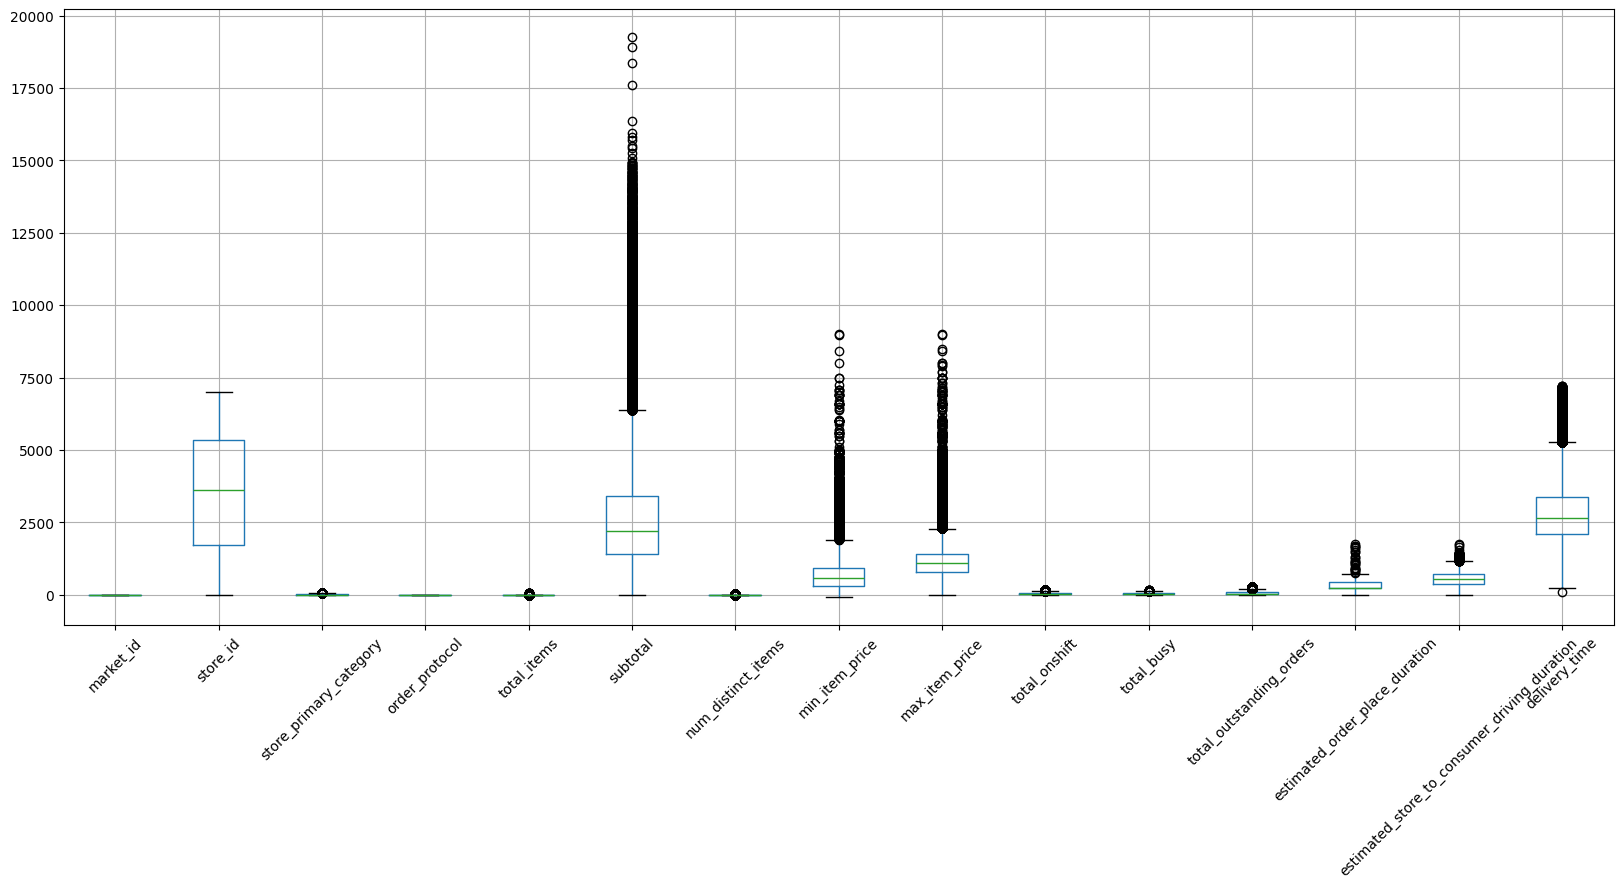

In [73]:
plt.figure(figsize=(20,8))
df_del.boxplot()
plt.xticks(rotation=45)
plt.show()

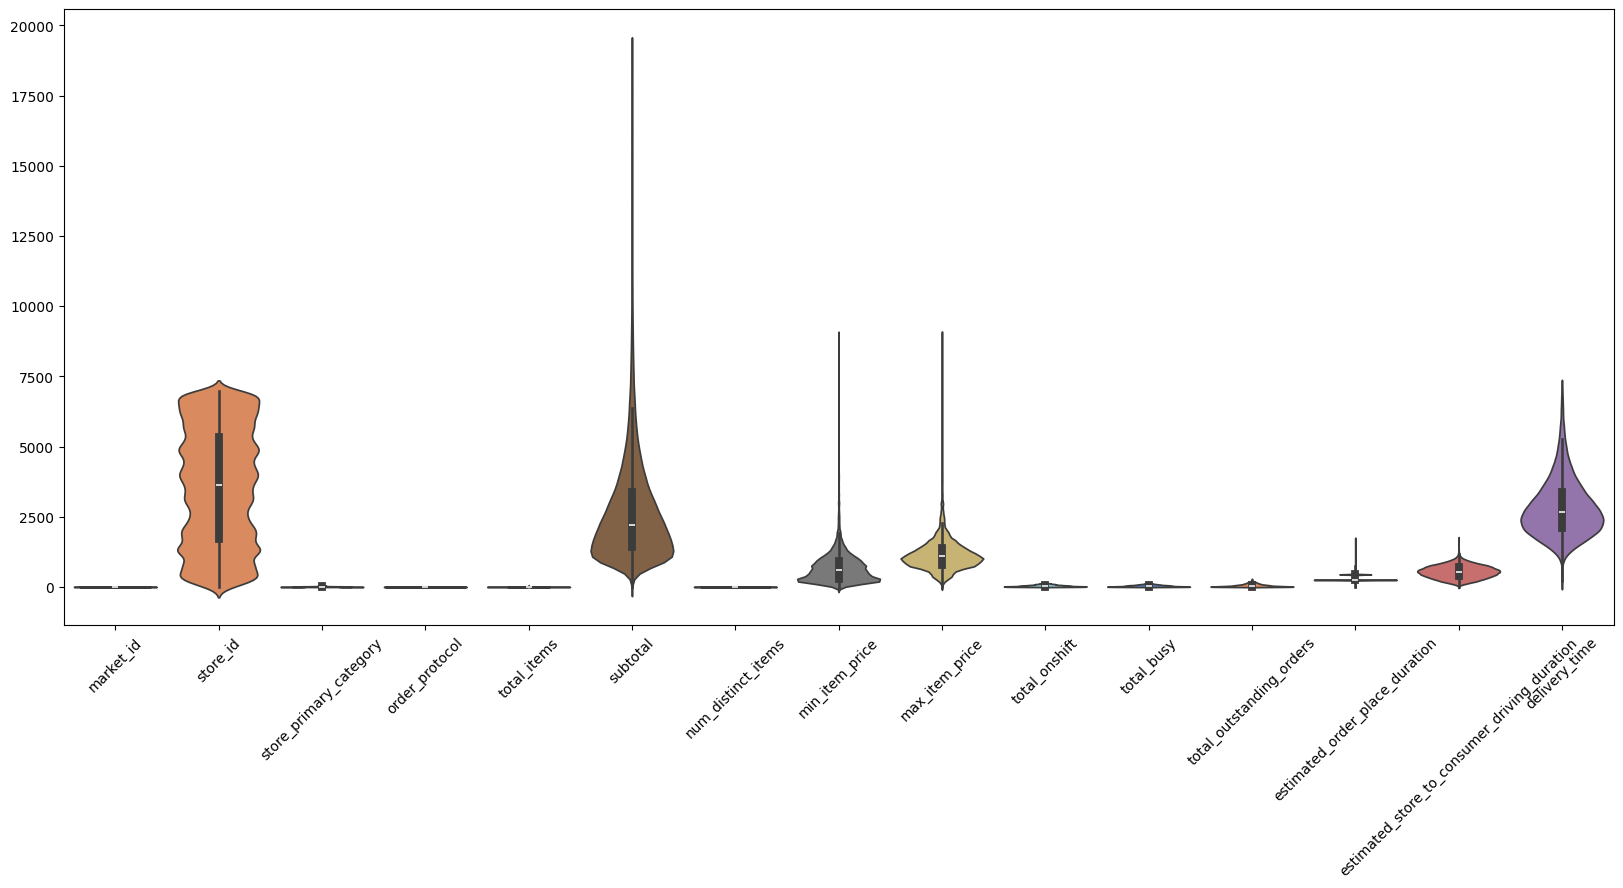

In [74]:
plt.figure(figsize=(20,8))
sns.violinplot(data=df_del, palette='muted')
plt.xticks(rotation=45)
plt.show()

In [75]:
list(df_del.columns)

['market_id',
 'store_id',
 'store_primary_category',
 'order_protocol',
 'total_items',
 'subtotal',
 'num_distinct_items',
 'min_item_price',
 'max_item_price',
 'total_onshift',
 'total_busy',
 'total_outstanding_orders',
 'estimated_order_place_duration',
 'estimated_store_to_consumer_driving_duration',
 'delivery_time']

In [76]:
for i in list(df_del.columns):
# IQR을 계산
    Q1 = df_del[i].quantile(0.25)
    Q3 = df_del[i].quantile(0.75)
    IQR = Q3 - Q1
    
    # IQR을 사용하여 이상치 탐지
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # 이상치를 제거한 데이터프레임 생성
    #df_del2[i] = df_del[(df_del[i] >= lower_bound) & (df_del[i] <= upper_bound)]
    df_del = df_del[df_del[i] > lower_bound]
    df_del = df_del[df_del[i] < upper_bound]
df_del

market_id  store_id  store_primary_category  order_protocol  \
0             1.0      1845                       0             1.0   
1             2.0      5477                       1             2.0   
2             2.0      5477                       2             3.0   
3             1.0      2841                       3             1.0   
6             1.0      2841                       3             1.0   
...           ...       ...                     ...             ...   
174793        1.0      2956                      23             4.0   
174794        1.0      2956                      23             4.0   
174795        1.0      2956                      23             4.0   
174796        1.0      3630                       4             1.0   
174797        1.0      3630                       4             1.0   

        total_items  subtotal  num_distinct_items  min_item_price  \
0                 4      3441                   4             557   
1                 1      1900                   1            1400   
2                 4      4771                   3             820   
3                 1      1525                   1            1525   
6                 3      4375                   3            1325   
...             ...       ...                 ...             ...   
174793            3      1389                   3             345   
174794            6      3010                   4             405   
174795            5      1836                   3             300   
174796            1      1175                   1             535   
174797            4      2605                   4             425   

        max_item_price  total_onshift  total_busy  total_outstanding_orders  \
0                 1239           33.0        14.0                      21.0   
1                 1400            1.0         2.0                       2.0   
2                 1604            8.0         6.0                      18.0   
3                 1525            5.0         6.0                       8.0   
6                 1625            6.0         4.0                       3.0   
...                ...            ...         ...                       ...   
174793             649           17.0        17.0                      23.0   
174794             825           12.0        11.0                      14.0   
174795             399           39.0        41.0                      40.0   
174796             535            7.0         7.0                      12.0   
174797             750           20.0        20.0                      23.0   

        estimated_order_place_duration  \
0                                  446   
1                                  446   
2                                  446   
3                                  446   
6                                  446   
...                                ...   
174793                             251   
174794                             251   
174795                             251   
174796                             446   
174797                             446   

        estimated_store_to_consumer_driving_duration  delivery_time  
0                                              861.0         3779.0  
1                                              690.0         4024.0  
2                                              289.0         1586.0  
3                                              795.0         2273.0  
6                                              789.0         4976.0  
...                                              ...            ...  
174793                                         331.0         3907.0  
174794                                         915.0         3383.0  
174795                                         795.0         3008.0  
174796                                         384.0         3907.0  
174797                                         134.0         2228.0  

[135268 rows x 15 columns]

In [77]:
df_del.reset_index(drop=False, inplace=True)
df_del = df_del.drop(labels=['index'],axis=1)
df_del

market_id  store_id  store_primary_category  order_protocol  \
0             1.0      1845                       0             1.0   
1             2.0      5477                       1             2.0   
2             2.0      5477                       2             3.0   
3             1.0      2841                       3             1.0   
4             1.0      2841                       3             1.0   
...           ...       ...                     ...             ...   
135263        1.0      2956                      23             4.0   
135264        1.0      2956                      23             4.0   
135265        1.0      2956                      23             4.0   
135266        1.0      3630                       4             1.0   
135267        1.0      3630                       4             1.0   

        total_items  subtotal  num_distinct_items  min_item_price  \
0                 4      3441                   4             557   
1                 1      1900                   1            1400   
2                 4      4771                   3             820   
3                 1      1525                   1            1525   
4                 3      4375                   3            1325   
...             ...       ...                 ...             ...   
135263            3      1389                   3             345   
135264            6      3010                   4             405   
135265            5      1836                   3             300   
135266            1      1175                   1             535   
135267            4      2605                   4             425   

        max_item_price  total_onshift  total_busy  total_outstanding_orders  \
0                 1239           33.0        14.0                      21.0   
1                 1400            1.0         2.0                       2.0   
2                 1604            8.0         6.0                      18.0   
3                 1525            5.0         6.0                       8.0   
4                 1625            6.0         4.0                       3.0   
...                ...            ...         ...                       ...   
135263             649           17.0        17.0                      23.0   
135264             825           12.0        11.0                      14.0   
135265             399           39.0        41.0                      40.0   
135266             535            7.0         7.0                      12.0   
135267             750           20.0        20.0                      23.0   

        estimated_order_place_duration  \
0                                  446   
1                                  446   
2                                  446   
3                                  446   
4                                  446   
...                                ...   
135263                             251   
135264                             251   
135265                             251   
135266                             446   
135267                             446   

        estimated_store_to_consumer_driving_duration  delivery_time  
0                                              861.0         3779.0  
1                                              690.0         4024.0  
2                                              289.0         1586.0  
3                                              795.0         2273.0  
4                                              789.0         4976.0  
...                                              ...            ...  
135263                                         331.0         3907.0  
135264                                         915.0         3383.0  
135265                                         795.0         3008.0  
135266                                         384.0         3907.0  
135267                                         134.0         2228.0  

[135268 rows x 15 columns]

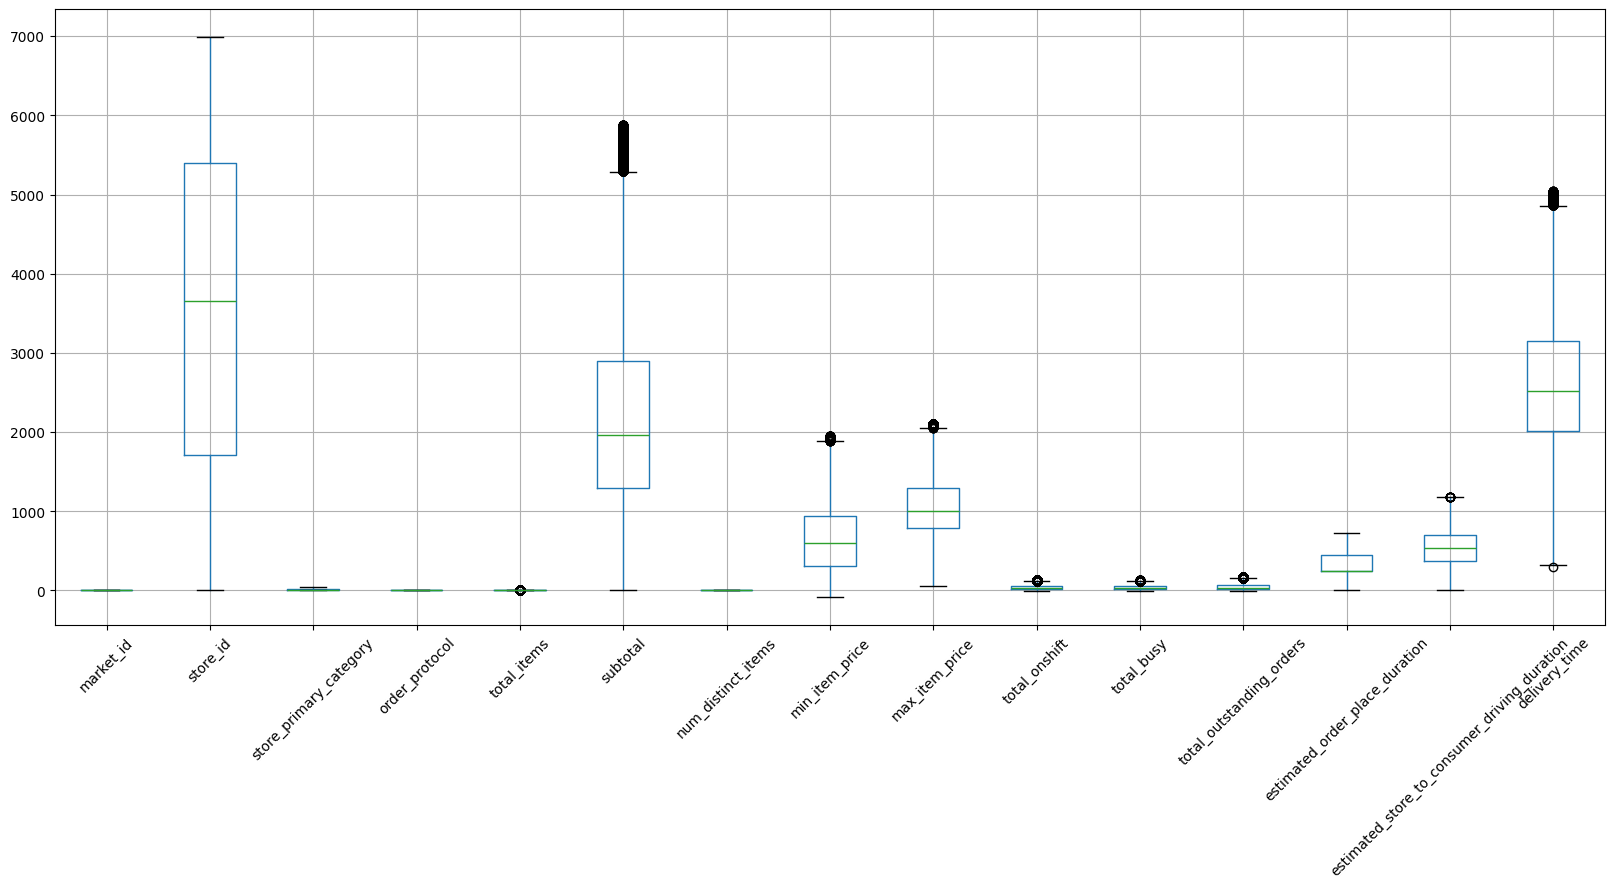

In [78]:
plt.figure(figsize=(20,8))
df_del.boxplot()
plt.xticks(rotation=45)
plt.show()

In [79]:
from sklearn.model_selection import train_test_split

train_dataset, val_dataset = train_test_split(df_del, test_size=0.1)

X_train = train_dataset.drop(labels='delivery_time',axis=1)
y_train = train_dataset['delivery_time']
X_val = val_dataset.drop(labels='delivery_time',axis=1)
y_val = val_dataset['delivery_time']

print('학습 이미지:', X_train.shape)
print('학습 레이블:', y_train.shape)
print('검증 이미지:', X_val.shape)
print('검증 레이블:', y_val.shape)

학습 이미지: (121741, 14)
학습 레이블: (121741,)
검증 이미지: (13527, 14)
검증 레이블: (13527,)


In [80]:
from sklearn.linear_model import LinearRegression
import time

start_time = time.time() # 시작 시간

model = LinearRegression()
model.fit(X_train, y_train)

print("소요된 시간(초 단위):", time.time() - start_time) # 실행 시간

소요된 시간(초 단위): 0.05541396141052246


In [81]:
# - 학습데이터 평가
score = model.score(X_train, y_train)
print(f'Train : {score}')

# - 테스트데이터 평가
score = model.score(X_val, y_val)
print(f'Test : {score}')

Train : 0.22908957883102454
Test : 0.22944612188451852


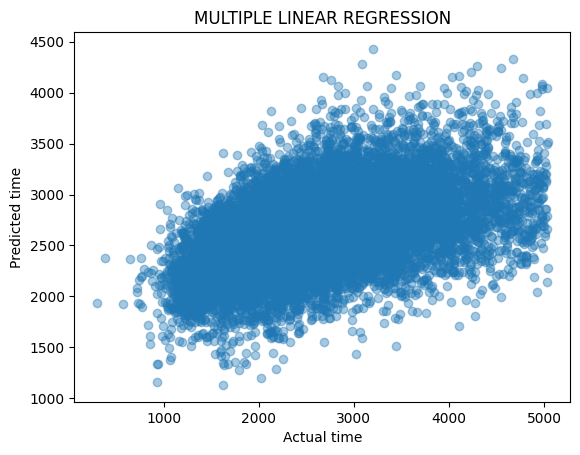

In [82]:
y_predict = model.predict(X_val)

plt.scatter(y_val, y_predict, alpha=0.4)
plt.xlabel("Actual time")
plt.ylabel("Predicted time")
plt.title("MULTIPLE LINEAR REGRESSION")
plt.show()

In [83]:
from sklearn.model_selection import GridSearchCV

# 예제 데이터 생성
X = df_del.drop(labels='delivery_time',axis=1)
y = df_del['delivery_time']

poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

X_train, X_val, y_train, y_val = train_test_split(X_poly, y, test_size=0.1, random_state=42)

# Ridge 모델 생성
#model = Lasso()
model = Ridge(alpha=11.0)
model.fit(X_train, y_train)

# 모델을 사용하여 예측 수행
y_pred = model.predict(X_val)

# 성능 지표 계산
mse = mean_squared_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)

print("MSE:", mse)
print("R-squared:", r2)

print('학습 평가 : ', model.score(X_train, y_train))
print('검증 평가 : ', model.score(X_val, y_val))

MSE: 513147.9885732555
R-squared: 0.25868983817904456
학습 평가 :  0.2627762364570435
검증 평가 :  0.25868983817904456


/home/user/ml/venv/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=2.39982e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


In [84]:
from sklearn.linear_model import RidgeCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

# 데이터 준비 (X와 y를 적절하게 설정)

# 표준 스케일링
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Ridge 모델을 위한 alpha 값 범위 설정
alphas = [3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9]

# RidgeCV를 사용하여 최적의 alpha 선택 (교차 검증 포함)
ridge_cv = RidgeCV(alphas=alphas, cv=5)
ridge_cv.fit(X_scaled, y)

# 최적의 alpha 값 출력
best_alpha = ridge_cv.alpha_
print(f"최적의 alpha: {best_alpha}")

# 최적의 alpha로 Ridge 모델을 학습
model = Ridge(alpha=best_alpha)
model.fit(X_scaled, y)

# 모델 성능 평가 (예: 교차 검증을 사용한 평가)
scores = cross_val_score(model, X_scaled, y, cv=5, scoring='neg_mean_squared_error')
mse_scores = -scores  # 음수로 나오므로 다시 양수로 변환
average_mse = mse_scores.mean()
print(f"평균 MSE: {average_mse}")

최적의 alpha: 3.6
평균 MSE: 542279.6649444841


In [85]:
from sklearn.model_selection import GridSearchCV

# 예제 데이터 생성
X = df_del.drop(labels='delivery_time',axis=1)
y = df_del['delivery_time']

poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

X_train, X_val, y_train, y_val = train_test_split(X_poly, y, test_size=0.1, random_state=42)

# Ridge 모델 생성
#model = Lasso()
model = Ridge(alpha=3.6)
model.fit(X_train, y_train)

# 모델을 사용하여 예측 수행
y_pred = model.predict(X_val)

# 성능 지표 계산
mse = mean_squared_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)

print("MSE:", mse)
print("R-squared:", r2)

print('학습 평가 : ', model.score(X_train, y_train))
print('검증 평가 : ', model.score(X_val, y_val))

MSE: 513147.7454713652
R-squared: 0.2586901893718887
학습 평가 :  0.2627762962703757
검증 평가 :  0.2586901893718887


/home/user/ml/venv/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=7.85394e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


/tmp/ipykernel_990/3955065711.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_del['subtotal'], palette='muted')


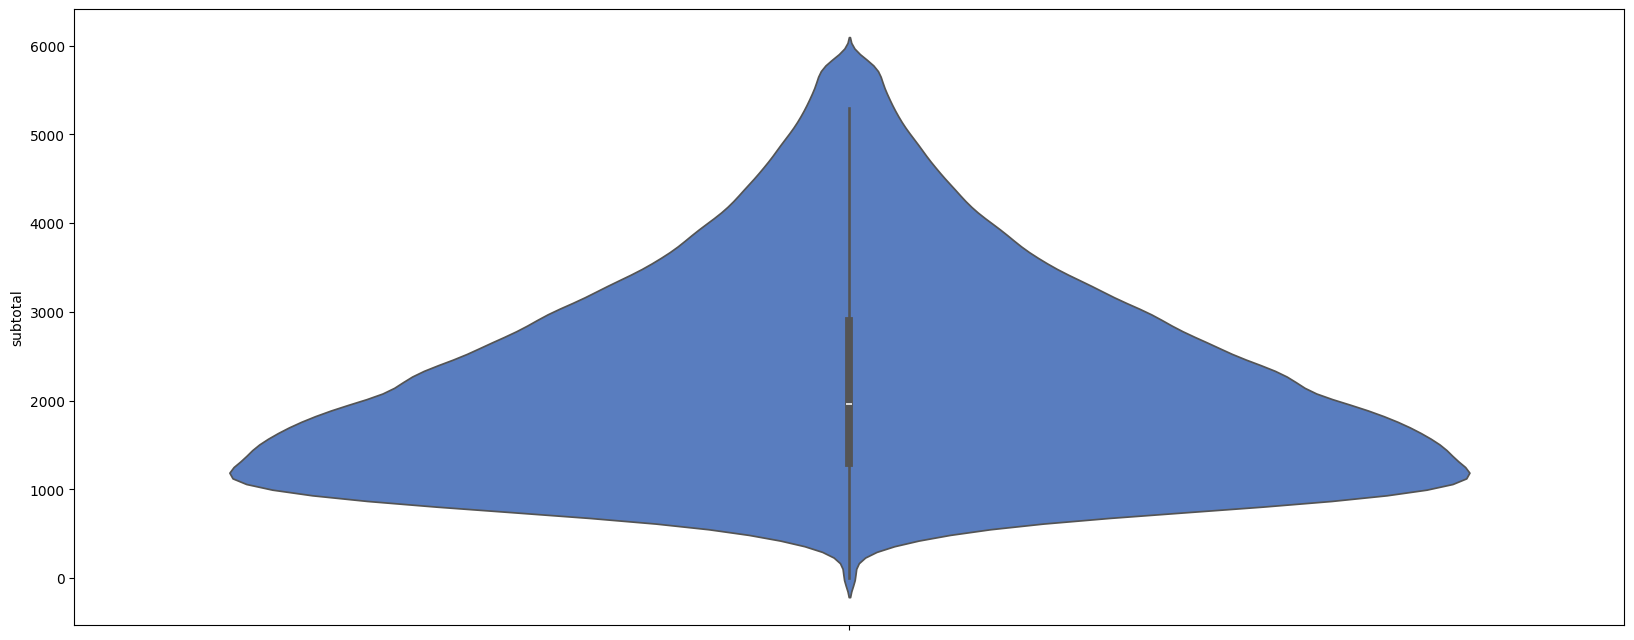

In [86]:
plt.figure(figsize=(20,8))
sns.violinplot(data=df_del['subtotal'], palette='muted')
plt.xticks(rotation=45)
plt.show()

In [87]:
# 예제 데이터 생성
X = df_del.drop(labels='delivery_time',axis=1)
y = df_del['delivery_time']

poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

X_train, X_val, y_train, y_val = train_test_split(X_poly, y, test_size=0.1, random_state=42)

# Ridge 모델 생성
#model = Lasso()
model = Ridge(alpha=3.6)
model.fit(X_train, y_train)

# 모델을 사용하여 예측 수행
y_pred = model.predict(X_val)

for actual, predicted in zip(X_val, y_pred):
    underpredictions = (predicted < actual).sum()
    total_predictions = len(X_val)
    underprediction_ratio = underpredictions / total_predictions

# 성능 지표 계산
mse = mean_squared_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)

print("MSE:", mse)
print("R-squared:", r2)

print('학습 평가 : ', model.score(X_train, y_train))
print('검증 평가 : ', model.score(X_val, y_val))

# 결과 출력
print(f'Under-prediction 비율: {underprediction_ratio:.2%}')

/home/user/ml/venv/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=7.85394e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


MSE: 513147.7454713652
R-squared: 0.2586901893718887
학습 평가 :  0.2627762962703757
검증 평가 :  0.2586901893718887
Under-prediction 비율: 0.44%


In [88]:
df_del

market_id  store_id  store_primary_category  order_protocol  \
0             1.0      1845                       0             1.0   
1             2.0      5477                       1             2.0   
2             2.0      5477                       2             3.0   
3             1.0      2841                       3             1.0   
4             1.0      2841                       3             1.0   
...           ...       ...                     ...             ...   
135263        1.0      2956                      23             4.0   
135264        1.0      2956                      23             4.0   
135265        1.0      2956                      23             4.0   
135266        1.0      3630                       4             1.0   
135267        1.0      3630                       4             1.0   

        total_items  subtotal  num_distinct_items  min_item_price  \
0                 4      3441                   4             557   
1                 1      1900                   1            1400   
2                 4      4771                   3             820   
3                 1      1525                   1            1525   
4                 3      4375                   3            1325   
...             ...       ...                 ...             ...   
135263            3      1389                   3             345   
135264            6      3010                   4             405   
135265            5      1836                   3             300   
135266            1      1175                   1             535   
135267            4      2605                   4             425   

        max_item_price  total_onshift  total_busy  total_outstanding_orders  \
0                 1239           33.0        14.0                      21.0   
1                 1400            1.0         2.0                       2.0   
2                 1604            8.0         6.0                      18.0   
3                 1525            5.0         6.0                       8.0   
4                 1625            6.0         4.0                       3.0   
...                ...            ...         ...                       ...   
135263             649           17.0        17.0                      23.0   
135264             825           12.0        11.0                      14.0   
135265             399           39.0        41.0                      40.0   
135266             535            7.0         7.0                      12.0   
135267             750           20.0        20.0                      23.0   

        estimated_order_place_duration  \
0                                  446   
1                                  446   
2                                  446   
3                                  446   
4                                  446   
...                                ...   
135263                             251   
135264                             251   
135265                             251   
135266                             446   
135267                             446   

        estimated_store_to_consumer_driving_duration  delivery_time  
0                                              861.0         3779.0  
1                                              690.0         4024.0  
2                                              289.0         1586.0  
3                                              795.0         2273.0  
4                                              789.0         4976.0  
...                                              ...            ...  
135263                                         331.0         3907.0  
135264                                         915.0         3383.0  
135265                                         795.0         3008.0  
135266                                         384.0         3907.0  
135267                                         134.0         2228.0  

[135268 rows x 15 columns]

In [89]:
len(df_del['store_id'].unique())

5378

In [90]:
df_mktime = df_del[['market_id', 'store_primary_category', 'total_items'
                    , 'subtotal', 'num_distinct_items', 'min_item_price'
                    , 'max_item_price', 'estimated_order_place_duration'
                    , 'estimated_store_to_consumer_driving_duration', 'delivery_time']]
df_mktime

market_id  store_primary_category  total_items  subtotal  \
0             1.0                       0            4      3441   
1             2.0                       1            1      1900   
2             2.0                       2            4      4771   
3             1.0                       3            1      1525   
4             1.0                       3            3      4375   
...           ...                     ...          ...       ...   
135263        1.0                      23            3      1389   
135264        1.0                      23            6      3010   
135265        1.0                      23            5      1836   
135266        1.0                       4            1      1175   
135267        1.0                       4            4      2605   

        num_distinct_items  min_item_price  max_item_price  \
0                        4             557            1239   
1                        1            1400            1400   
2                        3             820            1604   
3                        1            1525            1525   
4                        3            1325            1625   
...                    ...             ...             ...   
135263                   3             345             649   
135264                   4             405             825   
135265                   3             300             399   
135266                   1             535             535   
135267                   4             425             750   

        estimated_order_place_duration  \
0                                  446   
1                                  446   
2                                  446   
3                                  446   
4                                  446   
...                                ...   
135263                             251   
135264                             251   
135265                             251   
135266                             446   
135267                             446   

        estimated_store_to_consumer_driving_duration  delivery_time  
0                                              861.0         3779.0  
1                                              690.0         4024.0  
2                                              289.0         1586.0  
3                                              795.0         2273.0  
4                                              789.0         4976.0  
...                                              ...            ...  
135263                                         331.0         3907.0  
135264                                         915.0         3383.0  
135265                                         795.0         3008.0  
135266                                         384.0         3907.0  
135267                                         134.0         2228.0  

[135268 rows x 10 columns]

In [91]:
df_mktime['make_time'] = df_mktime['delivery_time'] - df_mktime['estimated_order_place_duration'] - df_mktime['estimated_store_to_consumer_driving_duration']
df_mktime

/tmp/ipykernel_990/649786494.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_mktime['make_time'] = df_mktime['delivery_time'] - df_mktime['estimated_order_place_duration'] - df_mktime['estimated_store_to_consumer_driving_duration']


market_id  store_primary_category  total_items  subtotal  \
0             1.0                       0            4      3441   
1             2.0                       1            1      1900   
2             2.0                       2            4      4771   
3             1.0                       3            1      1525   
4             1.0                       3            3      4375   
...           ...                     ...          ...       ...   
135263        1.0                      23            3      1389   
135264        1.0                      23            6      3010   
135265        1.0                      23            5      1836   
135266        1.0                       4            1      1175   
135267        1.0                       4            4      2605   

        num_distinct_items  min_item_price  max_item_price  \
0                        4             557            1239   
1                        1            1400            1400   
2                        3             820            1604   
3                        1            1525            1525   
4                        3            1325            1625   
...                    ...             ...             ...   
135263                   3             345             649   
135264                   4             405             825   
135265                   3             300             399   
135266                   1             535             535   
135267                   4             425             750   

        estimated_order_place_duration  \
0                                  446   
1                                  446   
2                                  446   
3                                  446   
4                                  446   
...                                ...   
135263                             251   
135264                             251   
135265                             251   
135266                             446   
135267                             446   

        estimated_store_to_consumer_driving_duration  delivery_time  make_time  
0                                              861.0         3779.0     2472.0  
1                                              690.0         4024.0     2888.0  
2                                              289.0         1586.0      851.0  
3                                              795.0         2273.0     1032.0  
4                                              789.0         4976.0     3741.0  
...                                              ...            ...        ...  
135263                                         331.0         3907.0     3325.0  
135264                                         915.0         3383.0     2217.0  
135265                                         795.0         3008.0     1962.0  
135266                                         384.0         3907.0     3077.0  
135267                                         134.0         2228.0     1648.0  

[135268 rows x 11 columns]

In [92]:
dataset2 = pd.read_csv("./delivery_raw.csv", delimiter='\t')
dataset2['time'] = pd.to_datetime(dataset2['created_at']).dt.hour
dataset2['time']

0         22
1         21
2         20
3         21
4          2
          ..
197423     0
197424     0
197425     4
197426    18
197427    19
Name: time, Length: 197428, dtype: int32

In [93]:
dataset2.loc[(0 <= dataset2['time']) & (dataset2['time'] < 7), 'day'] = 0
dataset2.loc[(7 <= dataset2['time']) & (dataset2['time'] < 11), 'day'] = 1
dataset2.loc[(11 <= dataset2['time']) & (dataset2['time'] < 17), 'day'] = 2
dataset2.loc[(17 <= dataset2['time']) & (dataset2['time'] < 21), 'day'] = 3
dataset2.loc[(21 <= dataset2['time']) & (dataset2['time'] < 24), 'day'] = 4
dataset2.loc[dataset2['time'] == 0, 'day'] = 4

In [94]:
dataset2['day']

0         4.0
1         4.0
2         3.0
3         4.0
4         0.0
         ... 
197423    4.0
197424    4.0
197425    0.0
197426    3.0
197427    3.0
Name: day, Length: 197428, dtype: float64

In [95]:
dataset2['estimated_order_place_duration']

0         446
1         446
2         446
3         446
4         446
         ... 
197423    251
197424    251
197425    251
197426    446
197427    446
Name: estimated_order_place_duration, Length: 197428, dtype: int64

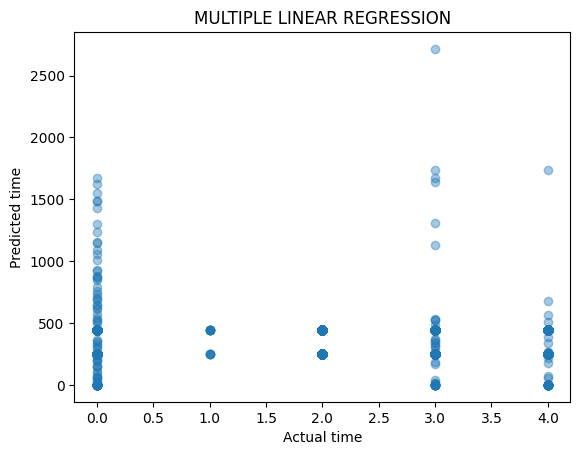

In [96]:
plt.scatter(dataset2['day'], dataset2['estimated_order_place_duration'], alpha=0.4)
plt.xlabel("Actual time")
plt.ylabel("Predicted time")
plt.title("MULTIPLE LINEAR REGRESSION")
plt.show()

In [97]:

# IQR을 계산
Q1 = dataset2['estimated_order_place_duration'].quantile(0.25)
Q3 = dataset2['estimated_order_place_duration'].quantile(0.75)
IQR = Q3 - Q1
    
    # IQR을 사용하여 이상치 탐지
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
    
    # 이상치를 제거한 데이터프레임 생성
    #df_del2[i] = df_del[(df_del[i] >= lower_bound) & (df_del[i] <= upper_bound)]
dataset2 = dataset2[dataset2['estimated_order_place_duration'] > lower_bound]
dataset2 = dataset2[dataset2['estimated_order_place_duration'] < upper_bound]

dataset2.reset_index(drop=False, inplace=True)
dataset2 = dataset2.drop(labels=['index'],axis=1)

dataset2

market_id           created_at actual_delivery_time  store_id  \
0             1.0  2015-02-06 22:24:17  2015-02-06 23:27:16      1845   
1             2.0  2015-02-10 21:49:25  2015-02-10 22:56:29      5477   
2             3.0  2015-01-22 20:39:28  2015-01-22 21:09:09      5477   
3             3.0  2015-02-03 21:21:45  2015-02-03 22:13:00      5477   
4             3.0  2015-02-15 02:40:36  2015-02-15 03:20:26      5477   
...           ...                  ...                  ...       ...   
197395        1.0  2015-02-17 00:19:41  2015-02-17 01:24:48      2956   
197396        1.0  2015-02-13 00:01:59  2015-02-13 00:58:22      2956   
197397        1.0  2015-01-24 04:46:08  2015-01-24 05:36:16      2956   
197398        1.0  2015-02-01 18:18:15  2015-02-01 19:23:22      3630   
197399        1.0  2015-02-08 19:24:33  2015-02-08 20:01:41      3630   

       store_primary_category  order_protocol  total_items  subtotal  \
0                    american             1.0            4      3441   
1                     mexican             2.0            1      1900   
2                         NaN             1.0            1      1900   
3                         NaN             1.0            6      6900   
4                         NaN             1.0            3      3900   
...                       ...             ...          ...       ...   
197395                   fast             4.0            3      1389   
197396                   fast             4.0            6      3010   
197397                   fast             4.0            5      1836   
197398               sandwich             1.0            1      1175   
197399               sandwich             1.0            4      2605   

        num_distinct_items  min_item_price  max_item_price  total_onshift  \
0                        4             557            1239           33.0   
1                        1            1400            1400            1.0   
2                        1            1900            1900            1.0   
3                        5             600            1800            1.0   
4                        3            1100            1600            6.0   
...                    ...             ...             ...            ...   
197395                   3             345             649           17.0   
197396                   4             405             825           12.0   
197397                   3             300             399           39.0   
197398                   1             535             535            7.0   
197399                   4             425             750           20.0   

        total_busy  total_outstanding_orders  estimated_order_place_duration  \
0             14.0                      21.0                             446   
1              2.0                       2.0                             446   
2              0.0                       0.0                             446   
3              1.0                       2.0                             446   
4              6.0                       9.0                             446   
...            ...                       ...                             ...   
197395        17.0                      23.0                             251   
197396        11.0                      14.0                             251   
197397        41.0                      40.0                             251   
197398         7.0                      12.0                             446   
197399        20.0                      23.0                             446   

        estimated_store_to_consumer_driving_duration  time  day  
0                                              861.0    22  4.0  
1                                              690.0    21  4.0  
2                                              690.0    20  3.0  
3                                              289.0    21  4.0  
4                                              650

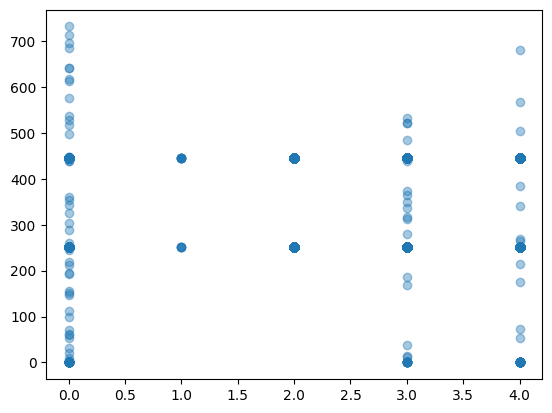

In [98]:
plt.scatter(dataset2['day'], dataset2['estimated_order_place_duration'], alpha=0.4)

plt.show()

In [99]:
dataset2.dtypes

market_id                                       float64
created_at                                       object
actual_delivery_time                             object
store_id                                          int64
store_primary_category                           object
order_protocol                                  float64
total_items                                       int64
subtotal                                          int64
num_distinct_items                                int64
min_item_price                                    int64
max_item_price                                    int64
total_onshift                                   float64
total_busy                                      float64
total_outstanding_orders                        float64
estimated_order_place_duration                    int64
estimated_store_to_consumer_driving_duration    float64
time                                              int32
day                                             

In [100]:
category = []

category = dataset2['store_primary_category'].unique().tolist()
df_category = dataset2['store_primary_category'].to_list()

for i in range(len(df_category)):
    df_category[i] = category.index(df_category[i])
    
dataset2['store_primary_category'] = df_category
dataset2

market_id           created_at actual_delivery_time  store_id  \
0             1.0  2015-02-06 22:24:17  2015-02-06 23:27:16      1845   
1             2.0  2015-02-10 21:49:25  2015-02-10 22:56:29      5477   
2             3.0  2015-01-22 20:39:28  2015-01-22 21:09:09      5477   
3             3.0  2015-02-03 21:21:45  2015-02-03 22:13:00      5477   
4             3.0  2015-02-15 02:40:36  2015-02-15 03:20:26      5477   
...           ...                  ...                  ...       ...   
197395        1.0  2015-02-17 00:19:41  2015-02-17 01:24:48      2956   
197396        1.0  2015-02-13 00:01:59  2015-02-13 00:58:22      2956   
197397        1.0  2015-01-24 04:46:08  2015-01-24 05:36:16      2956   
197398        1.0  2015-02-01 18:18:15  2015-02-01 19:23:22      3630   
197399        1.0  2015-02-08 19:24:33  2015-02-08 20:01:41      3630   

        store_primary_category  order_protocol  total_items  subtotal  \
0                            0             1.0            4      3441   
1                            1             2.0            1      1900   
2                            2             1.0            1      1900   
3                            2             1.0            6      6900   
4                            2             1.0            3      3900   
...                        ...             ...          ...       ...   
197395                      25             4.0            3      1389   
197396                      25             4.0            6      3010   
197397                      25             4.0            5      1836   
197398                       5             1.0            1      1175   
197399                       5             1.0            4      2605   

        num_distinct_items  min_item_price  max_item_price  total_onshift  \
0                        4             557            1239           33.0   
1                        1            1400            1400            1.0   
2                        1            1900            1900            1.0   
3                        5             600            1800            1.0   
4                        3            1100            1600            6.0   
...                    ...             ...             ...            ...   
197395                   3             345             649           17.0   
197396                   4             405             825           12.0   
197397                   3             300             399           39.0   
197398                   1             535             535            7.0   
197399                   4             425             750           20.0   

        total_busy  total_outstanding_orders  estimated_order_place_duration  \
0             14.0                      21.0                             446   
1              2.0                       2.0                             446   
2              0.0                       0.0                             446   
3              1.0                       2.0                             446   
4              6.0                       9.0                             446   
...            ...                       ...                             ...   
197395        17.0                      23.0                             251   
197396        11.0                      14.0                             251   
197397        41.0                      40.0                             251   
197398         7.0                      12.0                             446   
197399        20.0                      23.0                             446   

        estimated_store_to_consumer_driving_duration  time  day  
0                                              861.0    22  4.0  
1                                              690.0    21  4.0  
2                                              690.0    20  3.0  
3                                              289.0    21  4.0  
4                                     

In [101]:
dataset2['created_at_time'] = pd.to_datetime(dataset2['created_at'])
dataset2['actual_delivery_time_time'] = pd.to_datetime(dataset2['actual_delivery_time'])
dataset2['time'] = dataset2['actual_delivery_time_time'] - dataset2['created_at_time']
dataset2['delivery_time'] = dataset2['time'].dt.total_seconds()

In [102]:
dataset2.dtypes

market_id                                               float64
created_at                                               object
actual_delivery_time                                     object
store_id                                                  int64
store_primary_category                                    int64
order_protocol                                          float64
total_items                                               int64
subtotal                                                  int64
num_distinct_items                                        int64
min_item_price                                            int64
max_item_price                                            int64
total_onshift                                           float64
total_busy                                              float64
total_outstanding_orders                                float64
estimated_order_place_duration                            int64
estimated_store_to_consumer_driving_dura

In [103]:
dataset2 = dataset2.drop(labels=['time', 'actual_delivery_time', 'created_at',
                     'created_at_time', 'actual_delivery_time_time'],axis=1)

<Axes: >

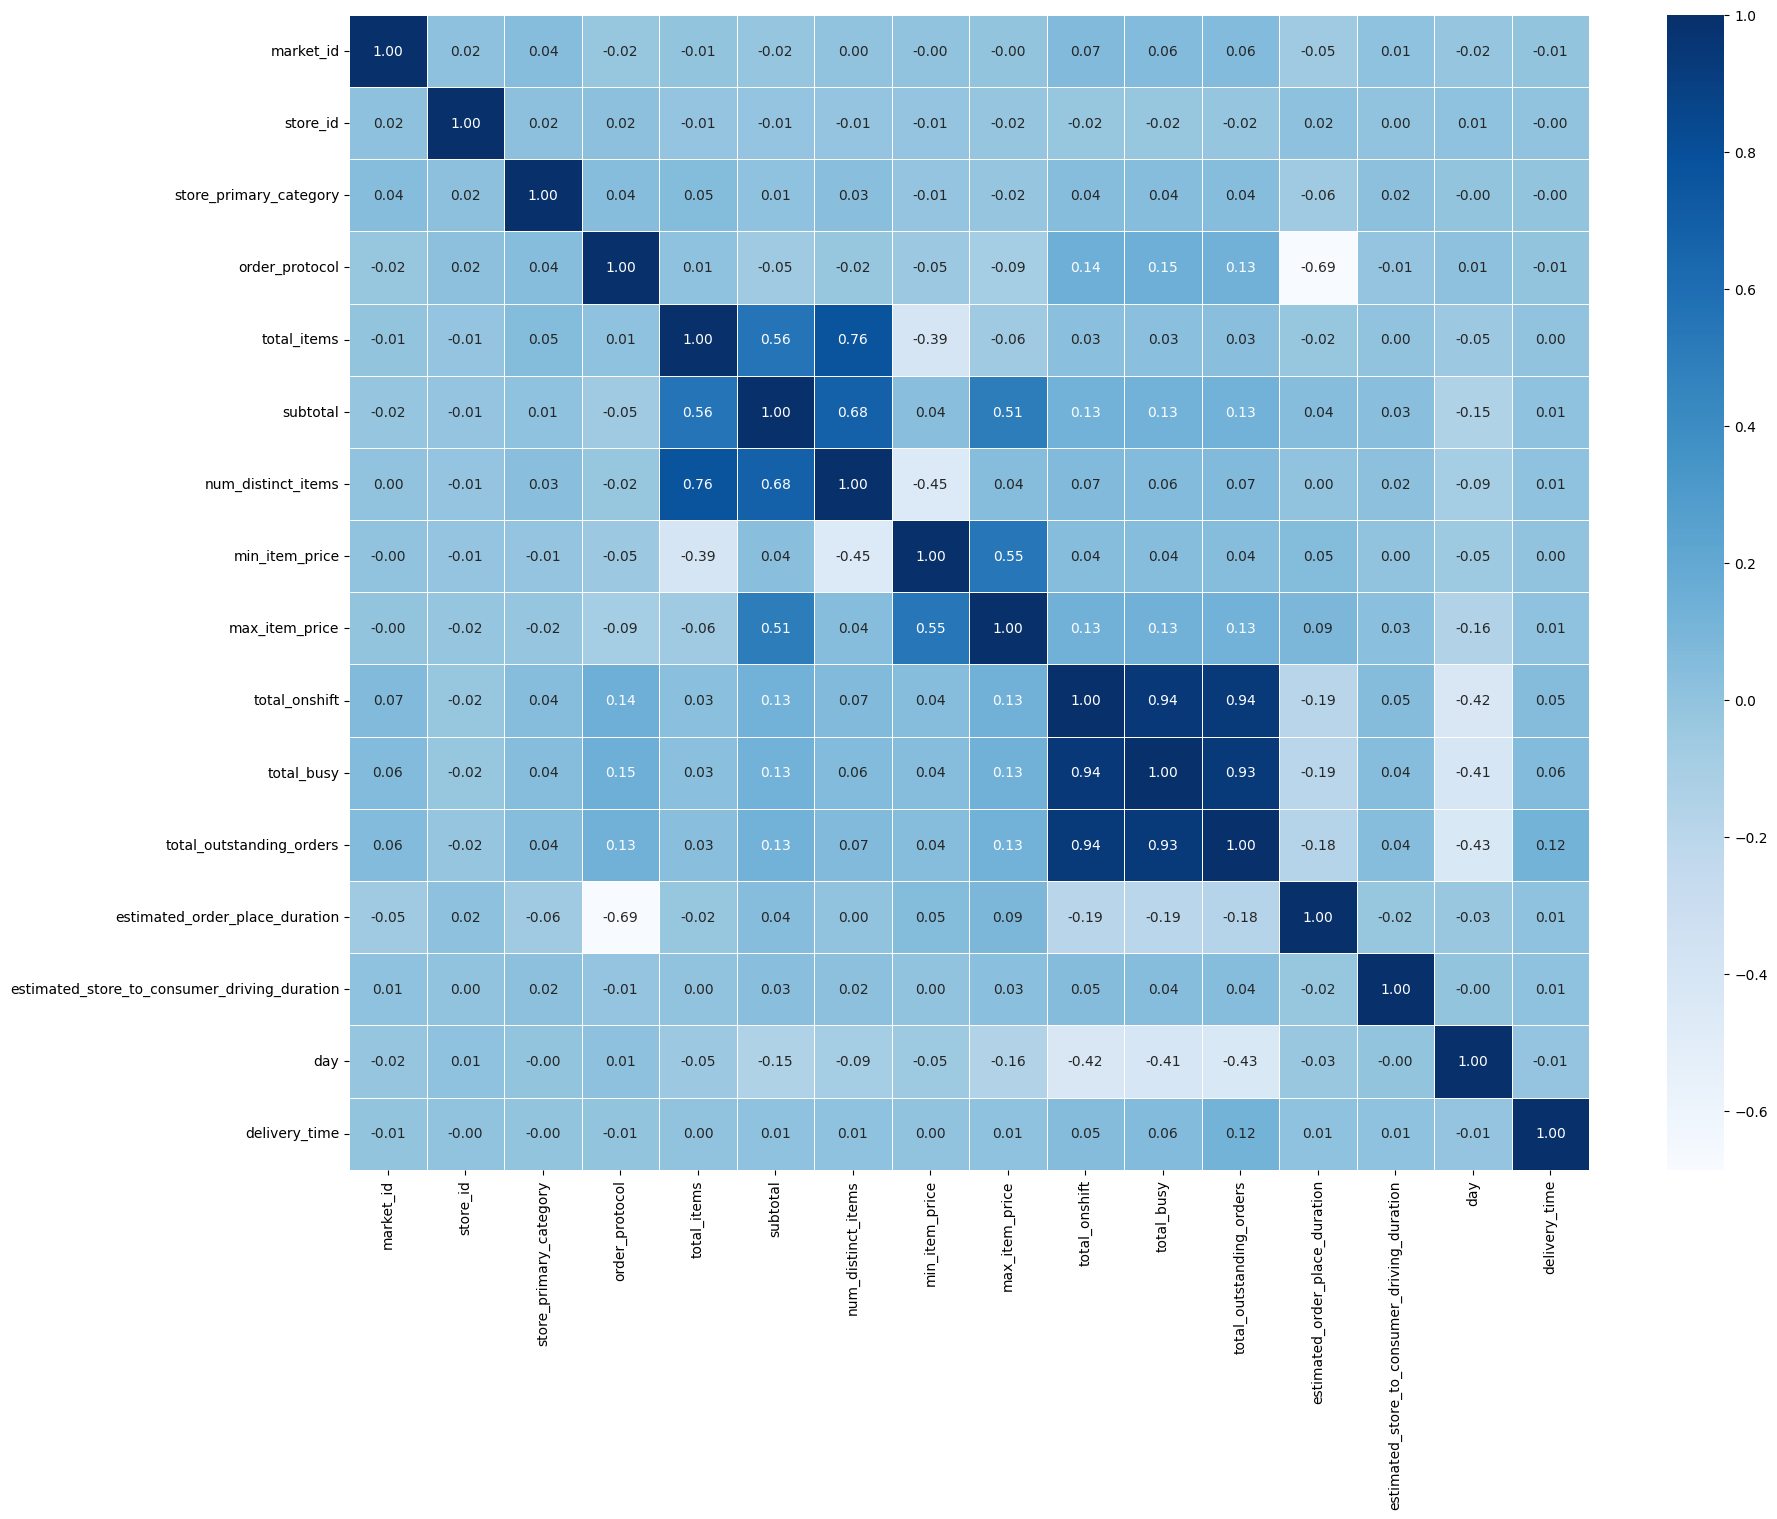

In [104]:
plt.figure(figsize=(20,15))
sns.heatmap(data = dataset2.corr(), annot=True, fmt = '.2f', linewidths=.5, cmap='Blues')

In [105]:
for i in list(dataset2.columns):
# IQR을 계산
    Q1 = dataset2[i].quantile(0.25)
    Q3 = dataset2[i].quantile(0.75)
    IQR = Q3 - Q1
    
    # IQR을 사용하여 이상치 탐지
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # 이상치를 제거한 데이터프레임 생성
    #df_del2[i] = df_del[(df_del[i] >= lower_bound) & (df_del[i] <= upper_bound)]
    dataset2 = dataset2[dataset2[i] > lower_bound]
    dataset2 = dataset2[dataset2[i] < upper_bound]

dataset2.reset_index(drop=False, inplace=True)
dataset2 = dataset2.drop(labels=['index'],axis=1)

dataset2

market_id  store_id  store_primary_category  order_protocol  \
0             1.0      1845                       0             1.0   
1             2.0      5477                       1             2.0   
2             3.0      5477                       2             1.0   
3             3.0      5477                       2             1.0   
4             3.0      5477                       2             1.0   
...           ...       ...                     ...             ...   
136165        1.0      2956                      25             4.0   
136166        1.0      2956                      25             4.0   
136167        1.0      2956                      25             4.0   
136168        1.0      3630                       5             1.0   
136169        1.0      3630                       5             1.0   

        total_items  subtotal  num_distinct_items  min_item_price  \
0                 4      3441                   4             557   
1                 1      1900                   1            1400   
2                 1      1900                   1            1900   
3                 3      3900                   3            1100   
4                 3      5000                   3            1500   
...             ...       ...                 ...             ...   
136165            3      1389                   3             345   
136166            6      3010                   4             405   
136167            5      1836                   3             300   
136168            1      1175                   1             535   
136169            4      2605                   4             425   

        max_item_price  total_onshift  total_busy  total_outstanding_orders  \
0                 1239           33.0        14.0                      21.0   
1                 1400            1.0         2.0                       2.0   
2                 1900            1.0         0.0                       0.0   
3                 1600            6.0         6.0                       9.0   
4                 1900            2.0         2.0                       2.0   
...                ...            ...         ...                       ...   
136165             649           17.0        17.0                      23.0   
136166             825           12.0        11.0                      14.0   
136167             399           39.0        41.0                      40.0   
136168             535            7.0         7.0                      12.0   
136169             750           20.0        20.0                      23.0   

        estimated_order_place_duration  \
0                                  446   
1                                  446   
2                                  446   
3                                  446   
4                                  446   
...                                ...   
136165                             251   
136166                             251   
136167                             251   
136168                             446   
136169                             446   

        estimated_store_to_consumer_driving_duration  day  delivery_time  
0                                              861.0  4.0         3779.0  
1                                              690.0  4.0         4024.0  
2                                              690.0  3.0         1781.0  
3                                              650.0  0.0         2390.0  
4                                              338.0  3.0         2300.0  
...                                              ...  ...            ...  
136165                                         331.0  4.0         3907.0  
136166                                         915.0  4.0         3383.0  
136167                                         795.0  0.0         3008.0  
136168                                         384.0  3.0         3907.0  
136169                                         

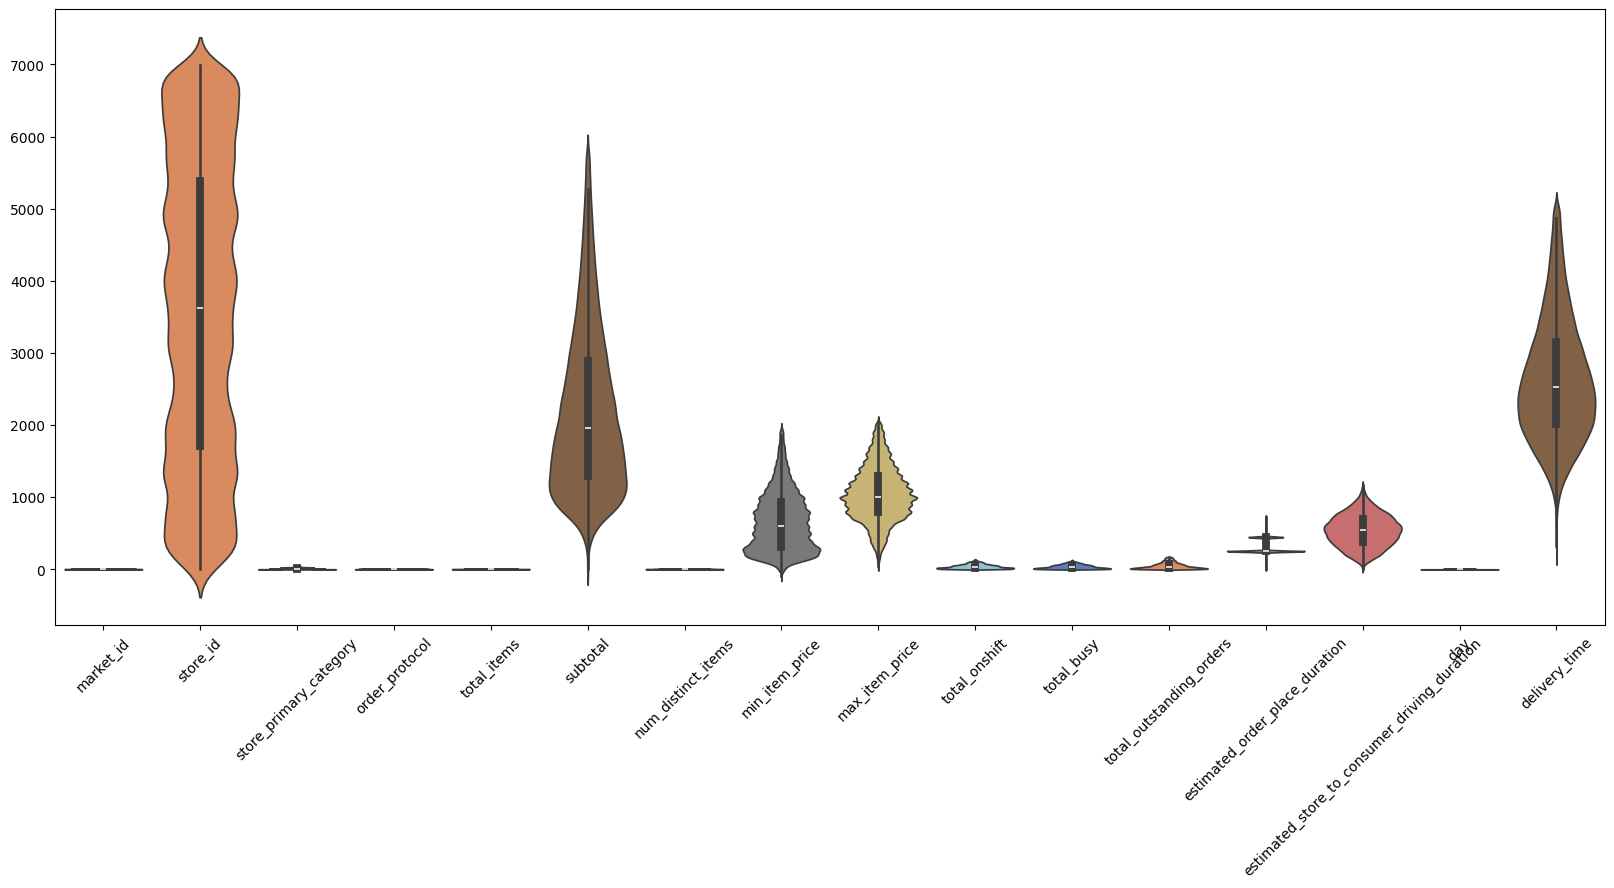

In [106]:
plt.figure(figsize=(20,8))
sns.violinplot(data=dataset2, palette='muted')
plt.xticks(rotation=45)
plt.show()

In [107]:
dataset2.columns

Index(['market_id', 'store_id', 'store_primary_category', 'order_protocol',
       'total_items', 'subtotal', 'num_distinct_items', 'min_item_price',
       'max_item_price', 'total_onshift', 'total_busy',
       'total_outstanding_orders', 'estimated_order_place_duration',
       'estimated_store_to_consumer_driving_duration', 'day', 'delivery_time'],
      dtype='object')

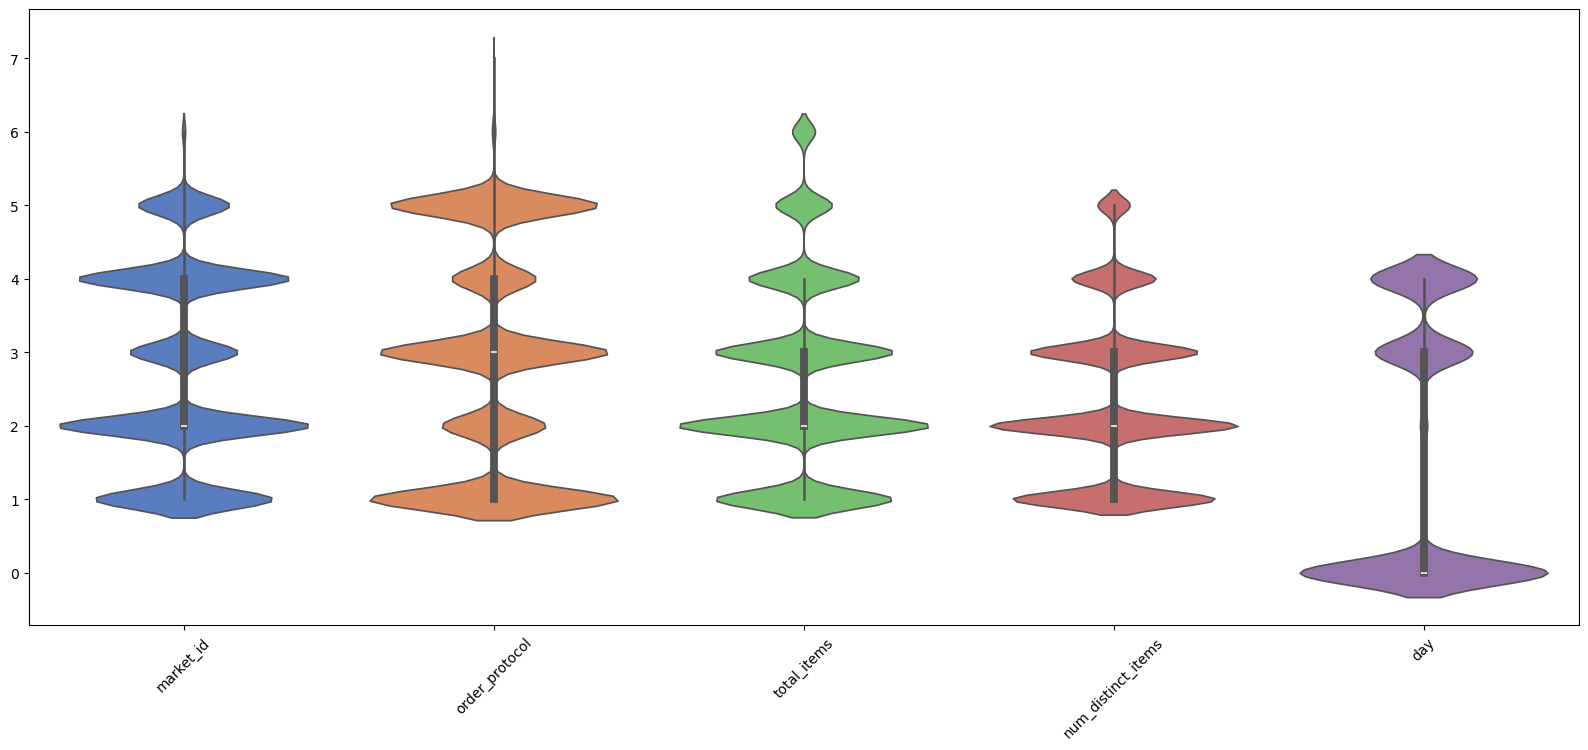

In [108]:
plt.figure(figsize=(20,8))
sns.violinplot(data=dataset2[['market_id', 'order_protocol',
                              'total_items', 'num_distinct_items', 'day']], palette='muted')
plt.xticks(rotation=45)
plt.show()

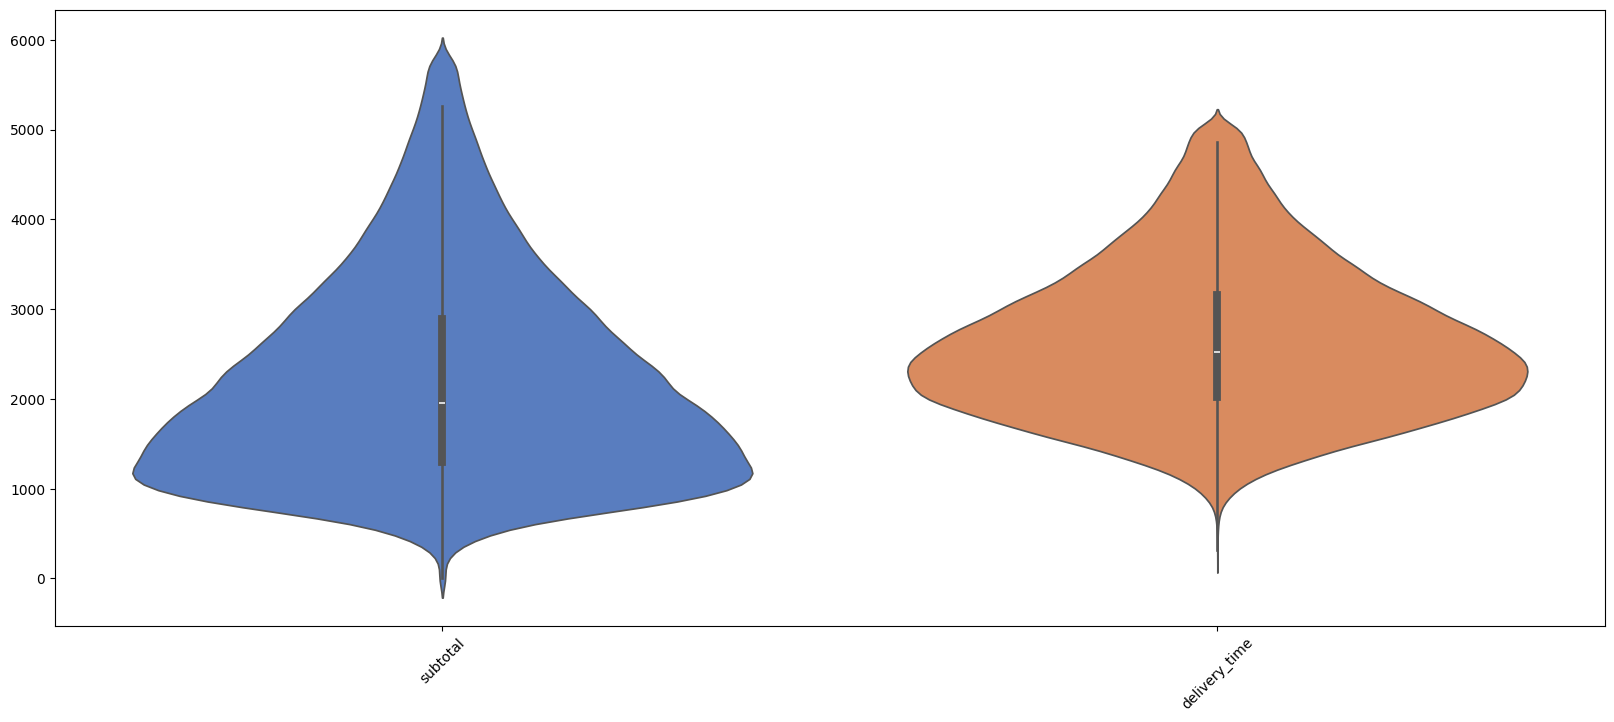

In [109]:
plt.figure(figsize=(20,8))
sns.violinplot(data=dataset2[['subtotal', 'delivery_time']], palette='muted')
plt.xticks(rotation=45)
plt.show()

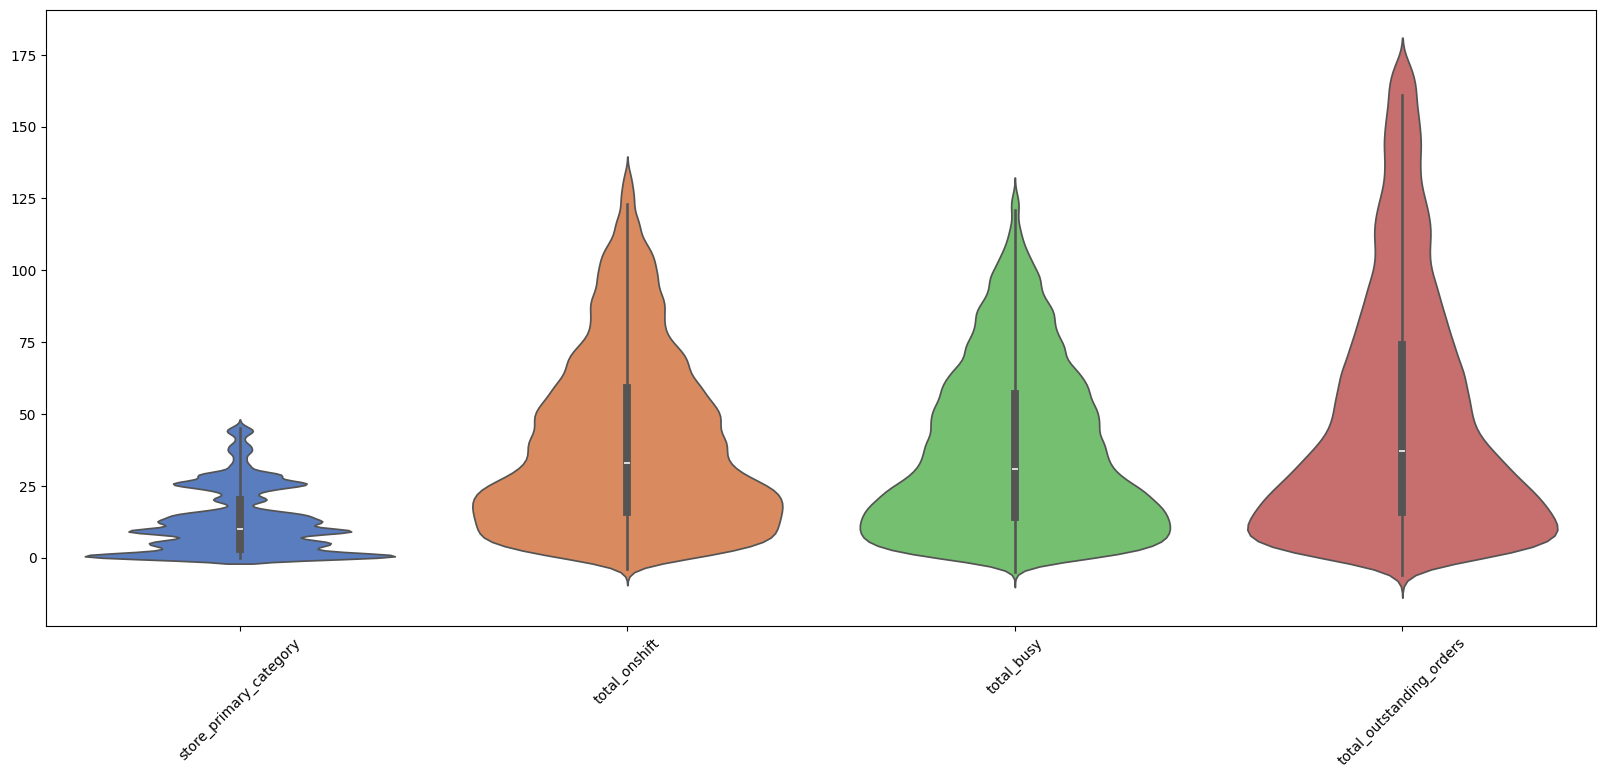

In [110]:
plt.figure(figsize=(20,8))
sns.violinplot(data=dataset2[['store_primary_category', 'total_onshift',
                              'total_busy', 'total_outstanding_orders']], palette='muted')
plt.xticks(rotation=45)
plt.show()

In [111]:
plt.figure(figsize=(20,8))
sns.violinplot(data=dataset2[['min_item_price', 'max_item_price']], palette='muted')
plt.xticks(rotation=45)
plt.show()

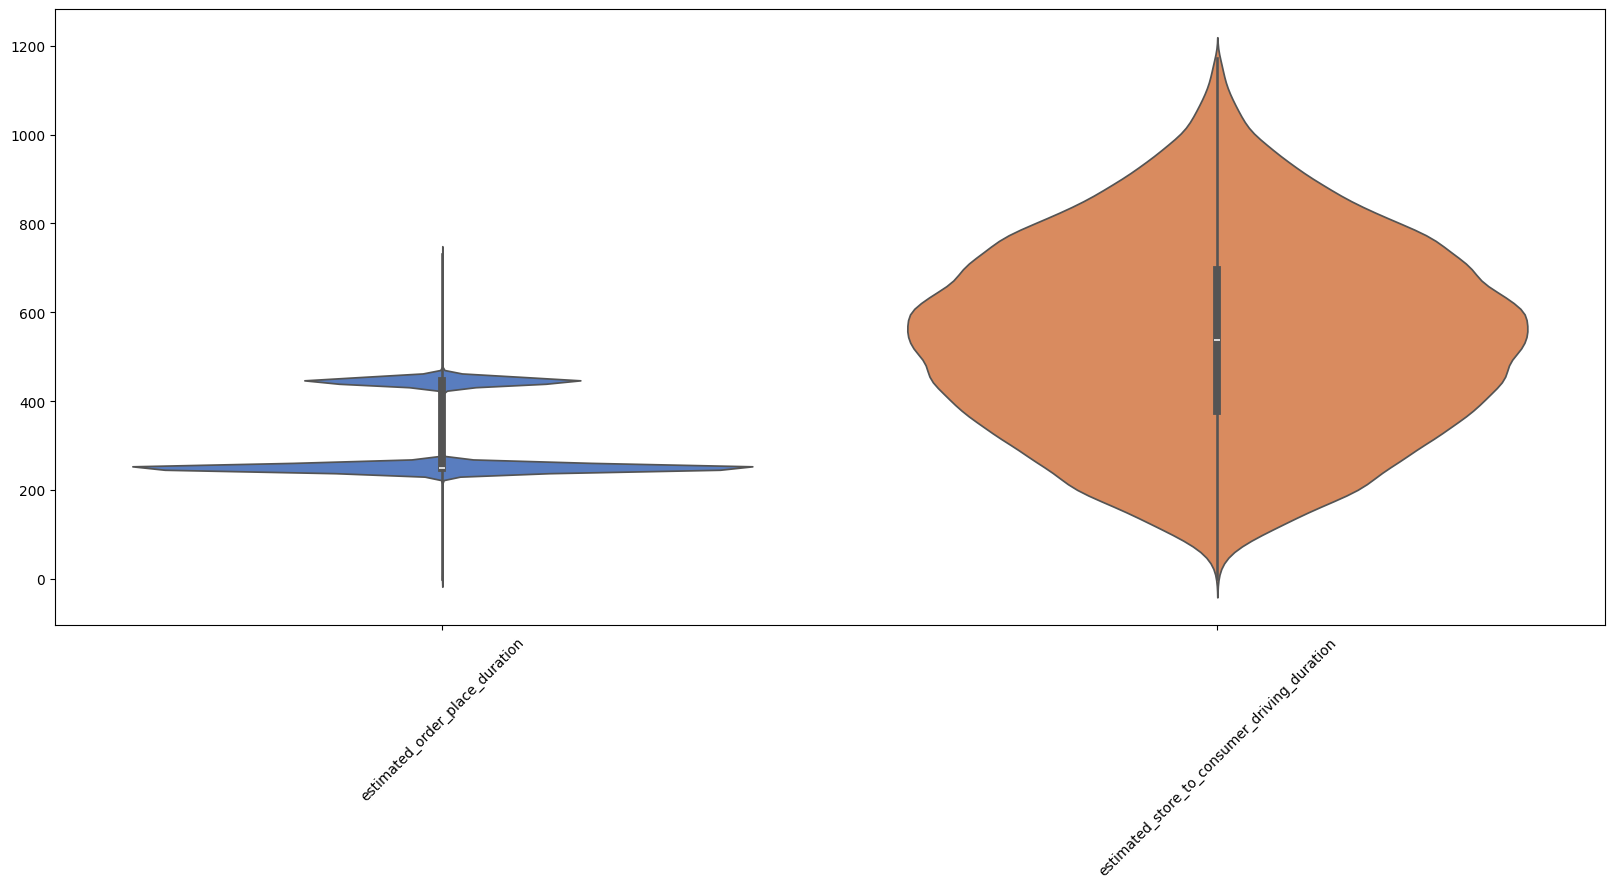

In [112]:
plt.figure(figsize=(20,8))
sns.violinplot(data=dataset2[['estimated_order_place_duration',
                              'estimated_store_to_consumer_driving_duration']], palette='muted')
plt.xticks(rotation=45)
plt.show()

In [113]:
ch_dataset = dataset2[['store_id', 'day', 'estimated_order_place_duration']]
ch_dataset

store_id  day  estimated_order_place_duration
0           1845  4.0                             446
1           5477  4.0                             446
2           5477  3.0                             446
3           5477  0.0                             446
4           5477  3.0                             446
...          ...  ...                             ...
136165      2956  4.0                             251
136166      2956  4.0                             251
136167      2956  0.0                             251
136168      3630  3.0                             446
136169      3630  3.0                             446

[136170 rows x 3 columns]

In [114]:
train_dataset, val_dataset = train_test_split(ch_dataset, test_size=0.1)

X_train = train_dataset.drop(labels='estimated_order_place_duration',axis=1)
y_train = train_dataset['estimated_order_place_duration']
X_val = val_dataset.drop(labels='estimated_order_place_duration',axis=1)
y_val = val_dataset['estimated_order_place_duration']

print('학습 이미지:', X_train.shape)
print('학습 레이블:', y_train.shape)
print('검증 이미지:', X_val.shape)
print('검증 레이블:', y_val.shape)

학습 이미지: (122553, 2)
학습 레이블: (122553,)
검증 이미지: (13617, 2)
검증 레이블: (13617,)


In [115]:

# 예제 데이터 생성
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

X_train, X_val, y_train, y_val = train_test_split(X_poly, y, test_size=0.1, random_state=42)

# Ridge 모델 생성
model = Lasso(alpha=1.0)
#model = Ridge(alpha=0.1)
model.fit(X_train, y_train)

# 모델을 사용하여 예측 수행
y_pred = model.predict(X_val)

# 성능 지표 계산
mse = mean_squared_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)

print("MSE:", mse)
print("R-squared:", r2)

print('학습 평가 : ', model.score(X_train, y_train))
print('검증 평가 : ', model.score(X_val, y_val))

MSE: 513617.79641387716
R-squared: 0.25801113859508173
학습 평가 :  0.26154036243900713
검증 평가 :  0.25801113859508173


/home/user/ml/venv/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.167e+10, tolerance: 8.565e+06
  model = cd_fast.enet_coordinate_descent(


In [116]:
mk_dataset = dataset2[['store_id', 'store_primary_category', 'total_items',
                     'num_distinct_items', 'max_item_price', 'delivery_time']]
mk_dataset

store_id  store_primary_category  total_items  num_distinct_items  \
0           1845                       0            4                   4   
1           5477                       1            1                   1   
2           5477                       2            1                   1   
3           5477                       2            3                   3   
4           5477                       2            3                   3   
...          ...                     ...          ...                 ...   
136165      2956                      25            3                   3   
136166      2956                      25            6                   4   
136167      2956                      25            5                   3   
136168      3630                       5            1                   1   
136169      3630                       5            4                   4   

        max_item_price  delivery_time  
0                 1239         3779.0  
1                 1400         4024.0  
2                 1900         1781.0  
3                 1600         2390.0  
4                 1900         2300.0  
...                ...            ...  
136165             649         3907.0  
136166             825         3383.0  
136167             399         3008.0  
136168             535         3907.0  
136169             750         2228.0  

[136170 rows x 6 columns]

In [117]:
del_dataset = dataset2[['market_id', 'day', 'total_onshift',
                        'total_busy', 'total_outstanding_orders',
                       'estimated_store_to_consumer_driving_duration']]
del_dataset

market_id  day  total_onshift  total_busy  total_outstanding_orders  \
0             1.0  4.0           33.0        14.0                      21.0   
1             2.0  4.0            1.0         2.0                       2.0   
2             3.0  3.0            1.0         0.0                       0.0   
3             3.0  0.0            6.0         6.0                       9.0   
4             3.0  3.0            2.0         2.0                       2.0   
...           ...  ...            ...         ...                       ...   
136165        1.0  4.0           17.0        17.0                      23.0   
136166        1.0  4.0           12.0        11.0                      14.0   
136167        1.0  0.0           39.0        41.0                      40.0   
136168        1.0  3.0            7.0         7.0                      12.0   
136169        1.0  3.0           20.0        20.0                      23.0   

        estimated_store_to_consumer_driving_duration  
0                                              861.0  
1                                              690.0  
2                                              690.0  
3                                              650.0  
4                                              338.0  
...                                              ...  
136165                                         331.0  
136166                                         915.0  
136167                                         795.0  
136168                                         384.0  
136169                                         134.0  

[136170 rows x 6 columns]

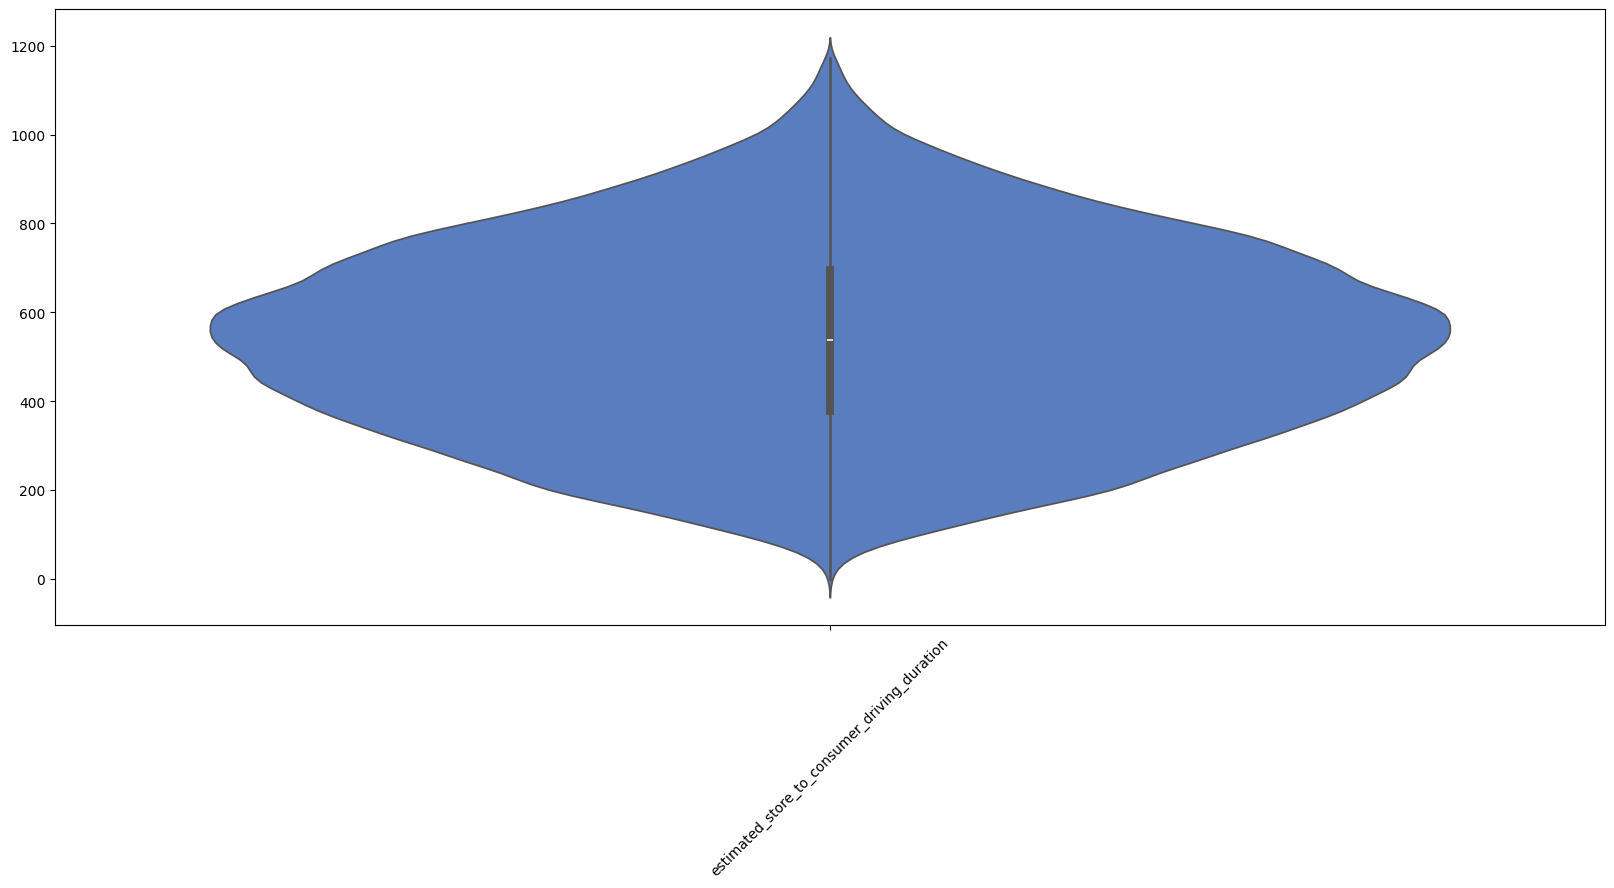

In [118]:
plt.figure(figsize=(20,8))
sns.violinplot(data=dataset2[['estimated_store_to_consumer_driving_duration']], palette='muted')
plt.xticks(rotation=45)
plt.show()

In [119]:
dataset2 = dataset2[dataset2['estimated_store_to_consumer_driving_duration'] >= 300]

dataset2.reset_index(drop=False, inplace=True)
dataset2 = dataset2.drop(labels=['index'],axis=1)

del_dataset = dataset2[['market_id', 'day', 'total_onshift',
                        'total_busy', 'total_outstanding_orders',
                       'estimated_store_to_consumer_driving_duration']]
del_dataset


market_id  day  total_onshift  total_busy  total_outstanding_orders  \
0             1.0  4.0           33.0        14.0                      21.0   
1             2.0  4.0            1.0         2.0                       2.0   
2             3.0  3.0            1.0         0.0                       0.0   
3             3.0  0.0            6.0         6.0                       9.0   
4             3.0  3.0            2.0         2.0                       2.0   
...           ...  ...            ...         ...                       ...   
115616        2.0  0.0           49.0        49.0                      65.0   
115617        1.0  4.0           17.0        17.0                      23.0   
115618        1.0  4.0           12.0        11.0                      14.0   
115619        1.0  0.0           39.0        41.0                      40.0   
115620        1.0  3.0            7.0         7.0                      12.0   

        estimated_store_to_consumer_driving_duration  
0                                              861.0  
1                                              690.0  
2                                              690.0  
3                                              650.0  
4                                              338.0  
...                                              ...  
115616                                         560.0  
115617                                         331.0  
115618                                         915.0  
115619                                         795.0  
115620                                         384.0  

[115621 rows x 6 columns]

In [120]:
dataset2['making'] = dataset2['delivery_time'] - dataset2['estimated_order_place_duration'] - dataset2['estimated_store_to_consumer_driving_duration']
dataset2['making']

0         2472.0
1         2888.0
2          645.0
3         1294.0
4         1516.0
           ...  
115616    2581.0
115617    3325.0
115618    2217.0
115619    1962.0
115620    3077.0
Name: making, Length: 115621, dtype: float64

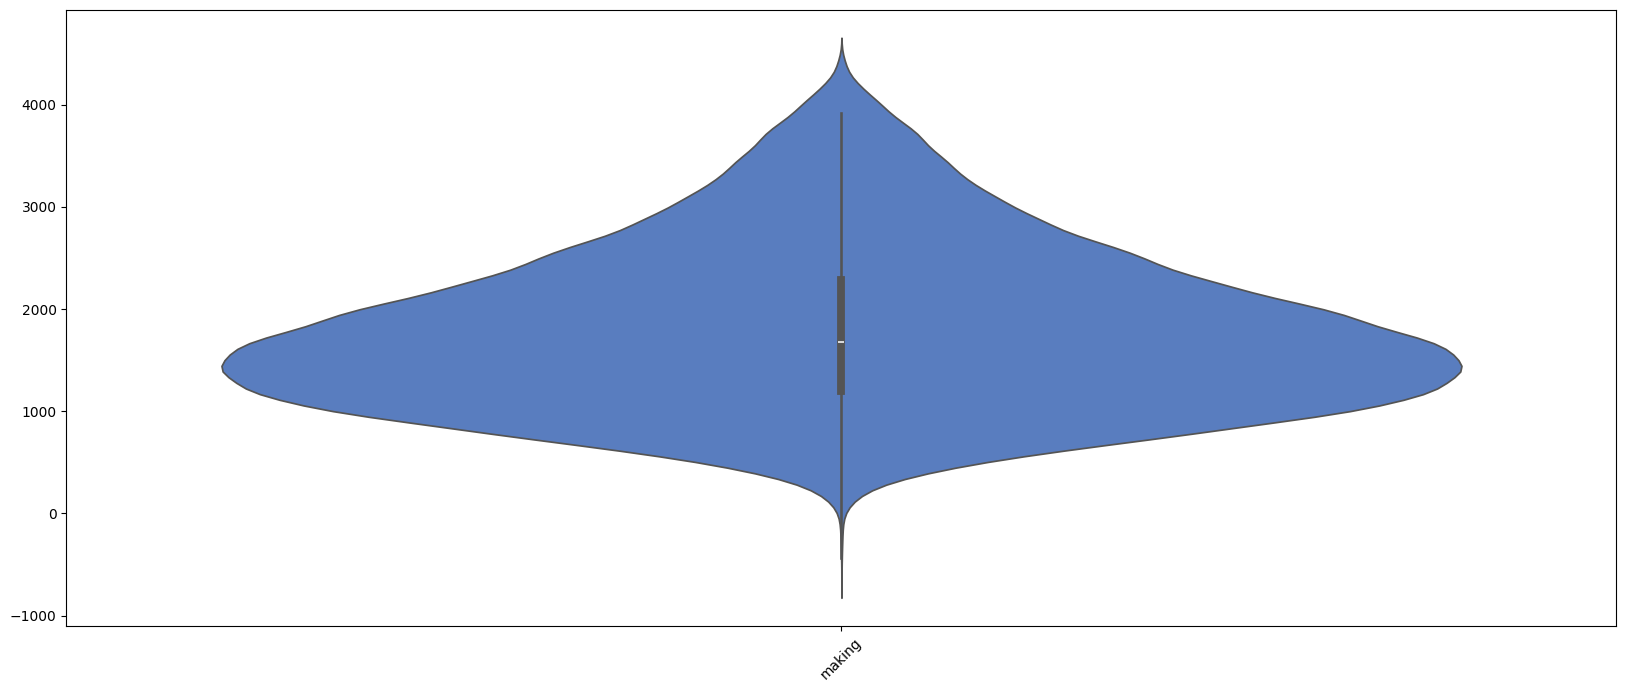

In [121]:
plt.figure(figsize=(20,8))
sns.violinplot(data=dataset2[['making']], palette='muted')
plt.xticks(rotation=45)
plt.show()

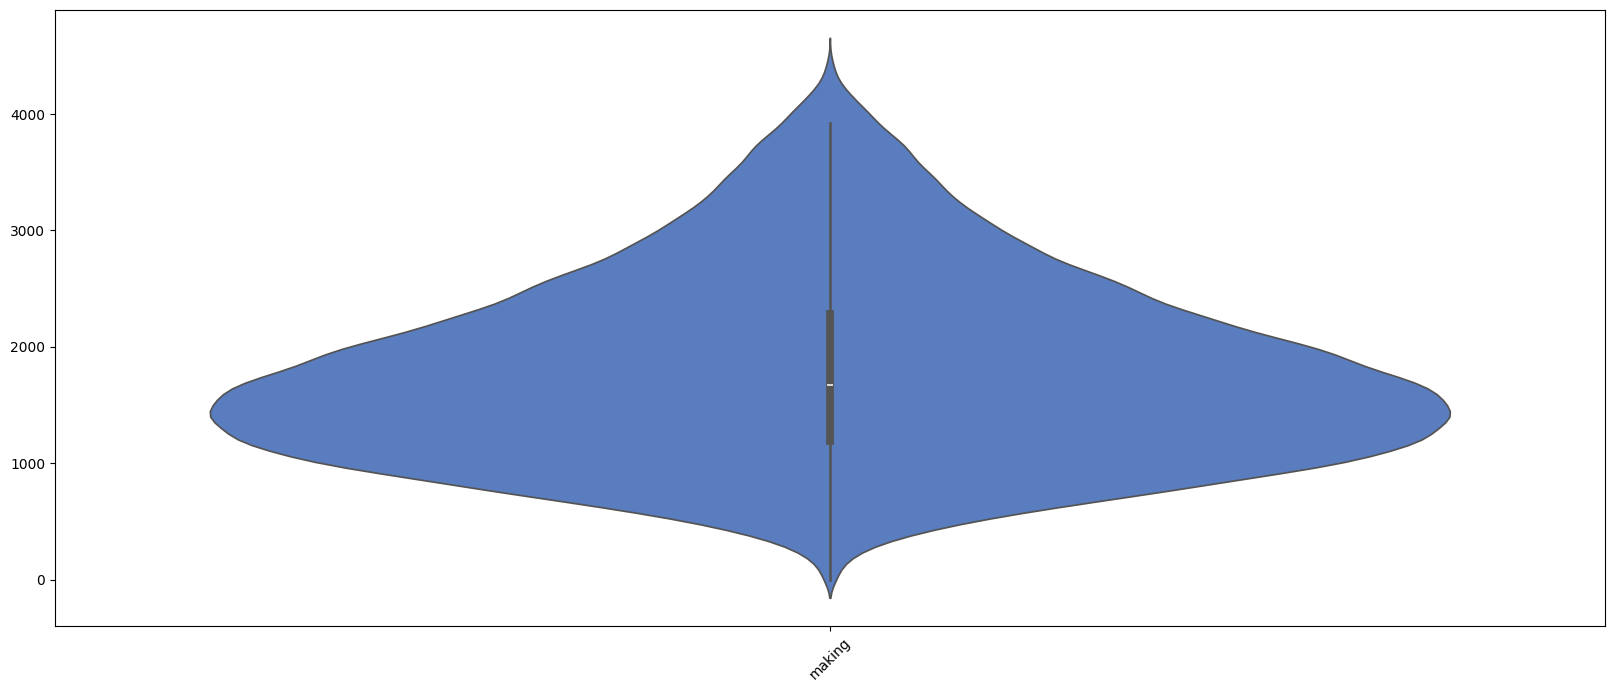

In [122]:
dataset2.loc[dataset2['making'] < 0] = 0

plt.figure(figsize=(20,8))
sns.violinplot(data=dataset2[['making']], palette='muted')
plt.xticks(rotation=45)
plt.show()

In [123]:
mk_dataset = dataset2[['store_id', 'store_primary_category', 'total_items',
                     'num_distinct_items', 'max_item_price', 'making']]
mk_dataset

store_id  store_primary_category  total_items  num_distinct_items  \
0           1845                       0            4                   4   
1           5477                       1            1                   1   
2           5477                       2            1                   1   
3           5477                       2            3                   3   
4           5477                       2            3                   3   
...          ...                     ...          ...                 ...   
115616      2956                       3            3                   3   
115617      2956                      25            3                   3   
115618      2956                      25            6                   4   
115619      2956                      25            5                   3   
115620      3630                       5            1                   1   

        max_item_price  making  
0                 1239  2472.0  
1                 1400  2888.0  
2                 1900   645.0  
3                 1600  1294.0  
4                 1900  1516.0  
...                ...     ...  
115616             685  2581.0  
115617             649  3325.0  
115618             825  2217.0  
115619             399  1962.0  
115620             535  3077.0  

[115621 rows x 6 columns]

In [124]:
train_dataset, val_dataset = train_test_split(mk_dataset, test_size=0.1)

X_train = train_dataset.drop(labels='making',axis=1)
y_train = train_dataset['making']
X_val = val_dataset.drop(labels='making',axis=1)
y_val = val_dataset['making']

print('학습 이미지:', X_train.shape)
print('학습 레이블:', y_train.shape)
print('검증 이미지:', X_val.shape)
print('검증 레이블:', y_val.shape)

학습 이미지: (104058, 5)
학습 레이블: (104058,)
검증 이미지: (11563, 5)
검증 레이블: (11563,)


In [125]:

# 예제 데이터 생성
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

X_train, X_val, y_train, y_val = train_test_split(X_poly, y, test_size=0.1, random_state=42)

# Ridge 모델 생성
#model = Lasso()
model = Ridge(alpha=1.0)
model.fit(X_train, y_train)

# 모델을 사용하여 예측 수행
y_pred = model.predict(X_val)

# 성능 지표 계산
mse = mean_squared_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)

print("MSE:", mse)
print("R-squared:", r2)

print('학습 평가 : ', model.score(X_train, y_train))
print('검증 평가 : ', model.score(X_val, y_val))

MSE: 513147.6796286904
R-squared: 0.2586902844903438
학습 평가 :  0.26277630303647725
검증 평가 :  0.2586902844903438


/home/user/ml/venv/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=2.18165e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


In [126]:
train_dataset, val_dataset = train_test_split(del_dataset, test_size=0.1)

X_train = train_dataset.drop(labels='estimated_store_to_consumer_driving_duration',axis=1)
y_train = train_dataset['estimated_store_to_consumer_driving_duration']
X_val = val_dataset.drop(labels='estimated_store_to_consumer_driving_duration',axis=1)
y_val = val_dataset['estimated_store_to_consumer_driving_duration']

print('학습 이미지:', X_train.shape)
print('학습 레이블:', y_train.shape)
print('검증 이미지:', X_val.shape)
print('검증 레이블:', y_val.shape)

학습 이미지: (104058, 5)
학습 레이블: (104058,)
검증 이미지: (11563, 5)
검증 레이블: (11563,)


In [127]:

# 예제 데이터 생성
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

X_train, X_val, y_train, y_val = train_test_split(X_poly, y, test_size=0.1, random_state=42)

# Ridge 모델 생성
#model = Lasso()
model = Ridge(alpha=1.0)
model.fit(X_train, y_train)

# 모델을 사용하여 예측 수행
y_pred = model.predict(X_val)

# 성능 지표 계산
mse = mean_squared_error(y_val, y_pred)
r2 = r2_score(y_val, y_pred)

print("MSE:", mse)
print("R-squared:", r2)

print('학습 평가 : ', model.score(X_train, y_train))
print('검증 평가 : ', model.score(X_val, y_val))

MSE: 513147.6796286904
R-squared: 0.2586902844903438
학습 평가 :  0.26277630303647725
검증 평가 :  0.2586902844903438


/home/user/ml/venv/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=2.18165e-20): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


In [128]:
pred = []
datasets = [ch_dataset, mk_dataset, del_dataset]
datacolumns = ['estimated_order_place_duration', 'making',
              'estimated_store_to_consumer_driving_duration']

for i in range(3):
    train_dataset, val_dataset = train_test_split(datasets[i], test_size=0.1)

    X_train = train_dataset.drop(labels=datacolumns[i],axis=1)
    y_train = train_dataset[datacolumns[i]]
    X_val = val_dataset.drop(labels=datacolumns[i],axis=1)
    y_val = val_dataset[datacolumns[i]]

# 예제 데이터 생성
    poly = PolynomialFeatures(degree=2)
    X_poly = poly.fit_transform(X)
    
    X_train, X_val, y_train, y_val = train_test_split(X_poly, y, test_size=0.1, random_state=42)
    
    # Ridge 모델 생성
    #model = Lasso()
    model = Ridge(alpha=10.0)
    model.fit(X_train, y_train)
    
    # 모델을 사용하여 예측 수행
    pred.append(model.predict(X_val))

y_pred = sum(pred)
# 성능 지표 계산
mse = mean_squared_error(y_val, y_pred)
rmse = np.sqrt(mse)

print("평균 제곱 오차 (MSE):", mse)
print("평균 제곱근 오차 (RMSE):", rmse)

print('학습 평가 : ', model.score(X_train, y_train))
print('검증 평가 : ', model.score(X_val, y_val))

for actual, predicted in zip(X_val, y_pred):
    underpredictions = (predicted < actual).sum()
    total_predictions = len(X_val)
    underprediction_ratio = underpredictions / total_predictions
# 결과 출력
print(f'Under-prediction 비율: {underprediction_ratio:.2%}')

/home/user/ml/venv/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=2.18165e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/user/ml/venv/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=2.18165e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


평균 제곱 오차 (MSE): 29061233.036536735
평균 제곱근 오차 (RMSE): 5390.847153883769
학습 평가 :  0.262776247965373
검증 평가 :  0.25868989235748285
Under-prediction 비율: 0.32%


/home/user/ml/venv/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=2.18165e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


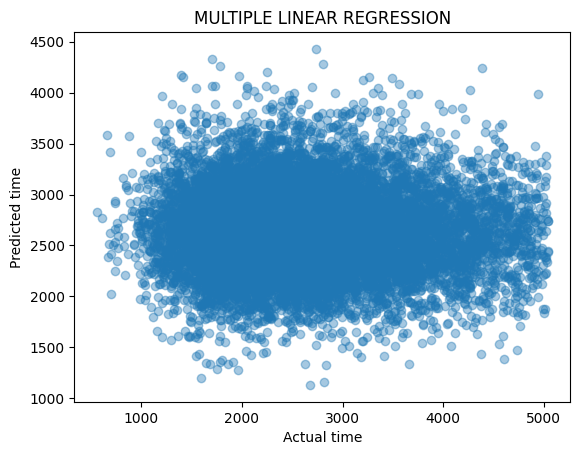

In [129]:
plt.scatter(y_val, y_predict, alpha=0.4)
plt.xlabel("Actual time")
plt.ylabel("Predicted time")
plt.title("MULTIPLE LINEAR REGRESSION")
plt.show()

In [132]:
pred = []
datasets = [mk_dataset, del_dataset]
datacolumns = ['making',
              'estimated_store_to_consumer_driving_duration']

for i in range(2):
    train_dataset, val_dataset = train_test_split(datasets[i], test_size=0.1)

    X_train = train_dataset.drop(labels=datacolumns[i],axis=1)
    y_train = train_dataset[datacolumns[i]]
    X_val = val_dataset.drop(labels=datacolumns[i],axis=1)
    y_val = val_dataset[datacolumns[i]]

# 예제 데이터 생성
    poly = PolynomialFeatures(degree=2)
    X_poly = poly.fit_transform(X)
    
    X_train, X_val, y_train, y_val = train_test_split(X_poly, y, test_size=0.1, random_state=42)
    
    # Ridge 모델 생성
    #model = Lasso()
    model = Ridge(alpha=10.0)
    model.fit(X_train, y_train)
    
    # 모델을 사용하여 예측 수행
    pred.append(model.predict(X_val))

y_pred = sum(pred) + 700
# 성능 지표 계산
mse = mean_squared_error(y_val, y_pred)
rmse = np.sqrt(mse)

print("평균 제곱 오차 (MSE):", mse)
print("평균 제곱근 오차 (RMSE):", rmse)

print('학습 평가 : ', model.score(X_train, y_train))
print('검증 평가 : ', model.score(X_val, y_val))

for actual, predicted in zip(X_val, y_pred):
    underpredictions = (predicted < actual).sum()
    total_predictions = len(X_val)
    underprediction_ratio = underpredictions / total_predictions
# 결과 출력
print(f'Under-prediction 비율: {underprediction_ratio:.2%}')

/home/user/ml/venv/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=2.18165e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/home/user/ml/venv/lib/python3.10/site-packages/sklearn/linear_model/_ridge.py:200: LinAlgWarning: Ill-conditioned matrix (rcond=2.18165e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


평균 제곱 오차 (MSE): 11838938.488334175
평균 제곱근 오차 (RMSE): 3440.7758555788223
학습 평가 :  0.262776247965373
검증 평가 :  0.25868989235748285
Under-prediction 비율: 0.33%


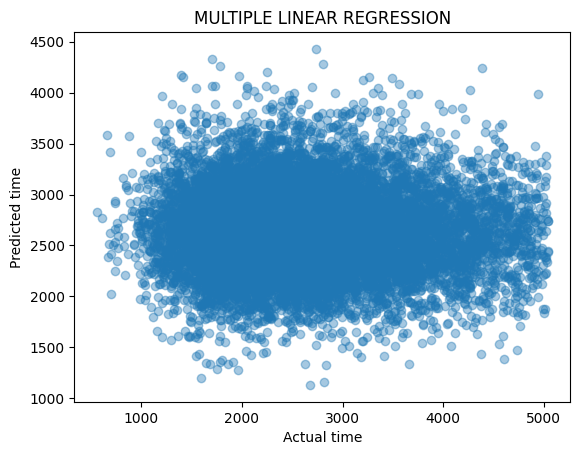

In [133]:
plt.scatter(y_val, y_predict, alpha=0.4)
plt.xlabel("Actual time")
plt.ylabel("Predicted time")
plt.title("MULTIPLE LINEAR REGRESSION")
plt.show()